In [1]:
import numpy as np
from lib.dvr2d import *
from lib.utils import *
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (8,6)
plt.rcParams["font.size"] = 14
plt.rcParams["figure.dpi"] = 300

%load_ext autoreload

In [2]:
r = []
theta = []
v = []
with open('mgnh.txt', 'r') as f:
# with open('h63.txt', 'r') as f:
    lines = f.readlines()
    for l in lines:
        r.append(float(l[:20]))
        theta.append(float(l[20:40]))
        v.append(float(l[40:-1]))

r = np.array(r)
theta = np.array(theta)
costheta = np.cos(theta)
v = np.array(v)
print(v.shape)
# print(theta)
print(np.unique(r))
print(np.unique(theta))
print(v)
# print(np.unique(r)[130])

(202101,)
[ 2.     2.005  2.01  ... 11.99  11.995 12.   ]
[0.         0.03141593 0.06283185 0.09424778 0.12566371 0.15707963
 0.18849556 0.21991149 0.25132741 0.28274334 0.31415927 0.34557519
 0.37699112 0.40840705 0.43982297 0.4712389  0.50265482 0.53407075
 0.56548668 0.5969026  0.62831853 0.65973446 0.69115038 0.72256631
 0.75398224 0.78539816 0.81681409 0.84823002 0.87964594 0.91106187
 0.9424778  0.97389372 1.00530965 1.03672558 1.0681415  1.09955743
 1.13097336 1.16238928 1.19380521 1.22522113 1.25663706 1.28805299
 1.31946891 1.35088484 1.38230077 1.41371669 1.44513262 1.47654855
 1.50796447 1.5393804  1.57079633 1.60221225 1.63362818 1.66504411
 1.69646003 1.72787596 1.75929189 1.79070781 1.82212374 1.85353967
 1.88495559 1.91637152 1.94778745 1.97920337 2.0106193  2.04203522
 2.07345115 2.10486708 2.136283   2.16769893 2.19911486 2.23053078
 2.26194671 2.29336264 2.32477856 2.35619449 2.38761042 2.41902634
 2.45044227 2.4818582  2.51327412 2.54469005 2.57610598 2.6075219
 2.63

In [3]:
ind_min1 = np.argmin(v)
print(ind_min1)
ind_min2 = np.argmin(v[theta < 1])
print(theta[ind_min1], theta[ind_min2])
print(v[ind_min1], v[ind_min2])
print(r[ind_min1], r[ind_min2])

200549
3.1415926536 0.9738937226
-113.6069704953 -92.7473342706
4.245 4.37


In [4]:
ind_min1 = np.argmin(v)
print(ind_min1)
ind_min2 = np.argmin(v[theta < 0.5])
print(theta[ind_min1], theta[ind_min2])
print(v[ind_min1], v[ind_min2])
print(r[ind_min1], r[ind_min2])

200549
3.1415926536 0.0
-113.6069704953 -92.3491973915
4.245 4.74


Text(0.5, 0, '$V$ (cm$^{-1}$)')

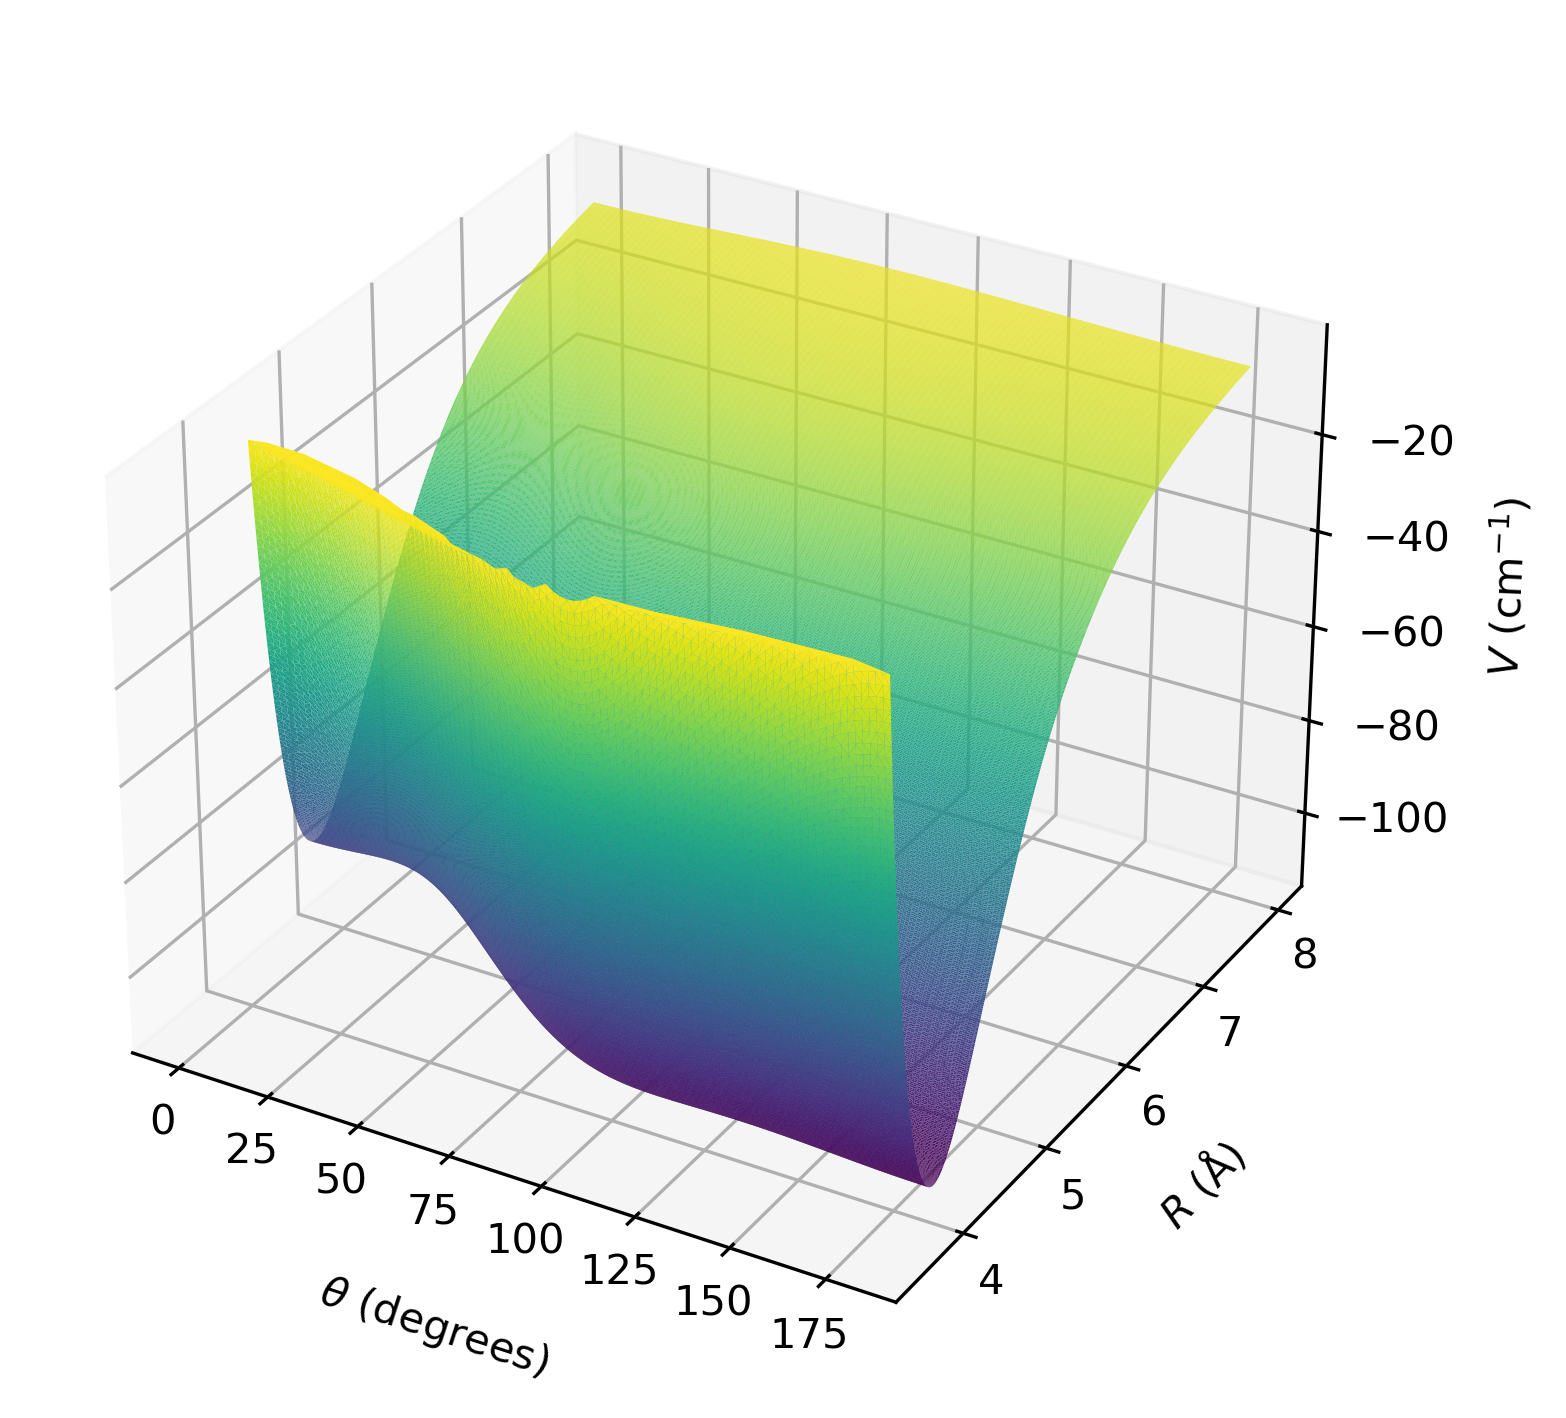

In [6]:
theta_p, r_p, v_p = theta[v < 0], r[v < 0], v[v < 0]
coef = 180 / np.pi

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_trisurf(theta_p[r_p < 8] * coef, r_p[r_p < 8], v_p[r_p < 8], cmap='viridis')
ax.tick_params('both', labelsize=10, pad=-2)
ax.tick_params('z', labelsize=10, pad=5)
ax.set_xlabel('$\\theta$ (degrees)', labelpad=5, fontsize=10)
ax.set_ylabel('$R$ (Å)', labelpad=0, fontsize=10)
ax.set_zlabel('$V$ (cm$^{-1}$)', labelpad=8, fontsize=10)

[-110. -105. -100.  -95.  -90.  -85.  -80.]


Text(0, 0.5, '$R$ (A)')

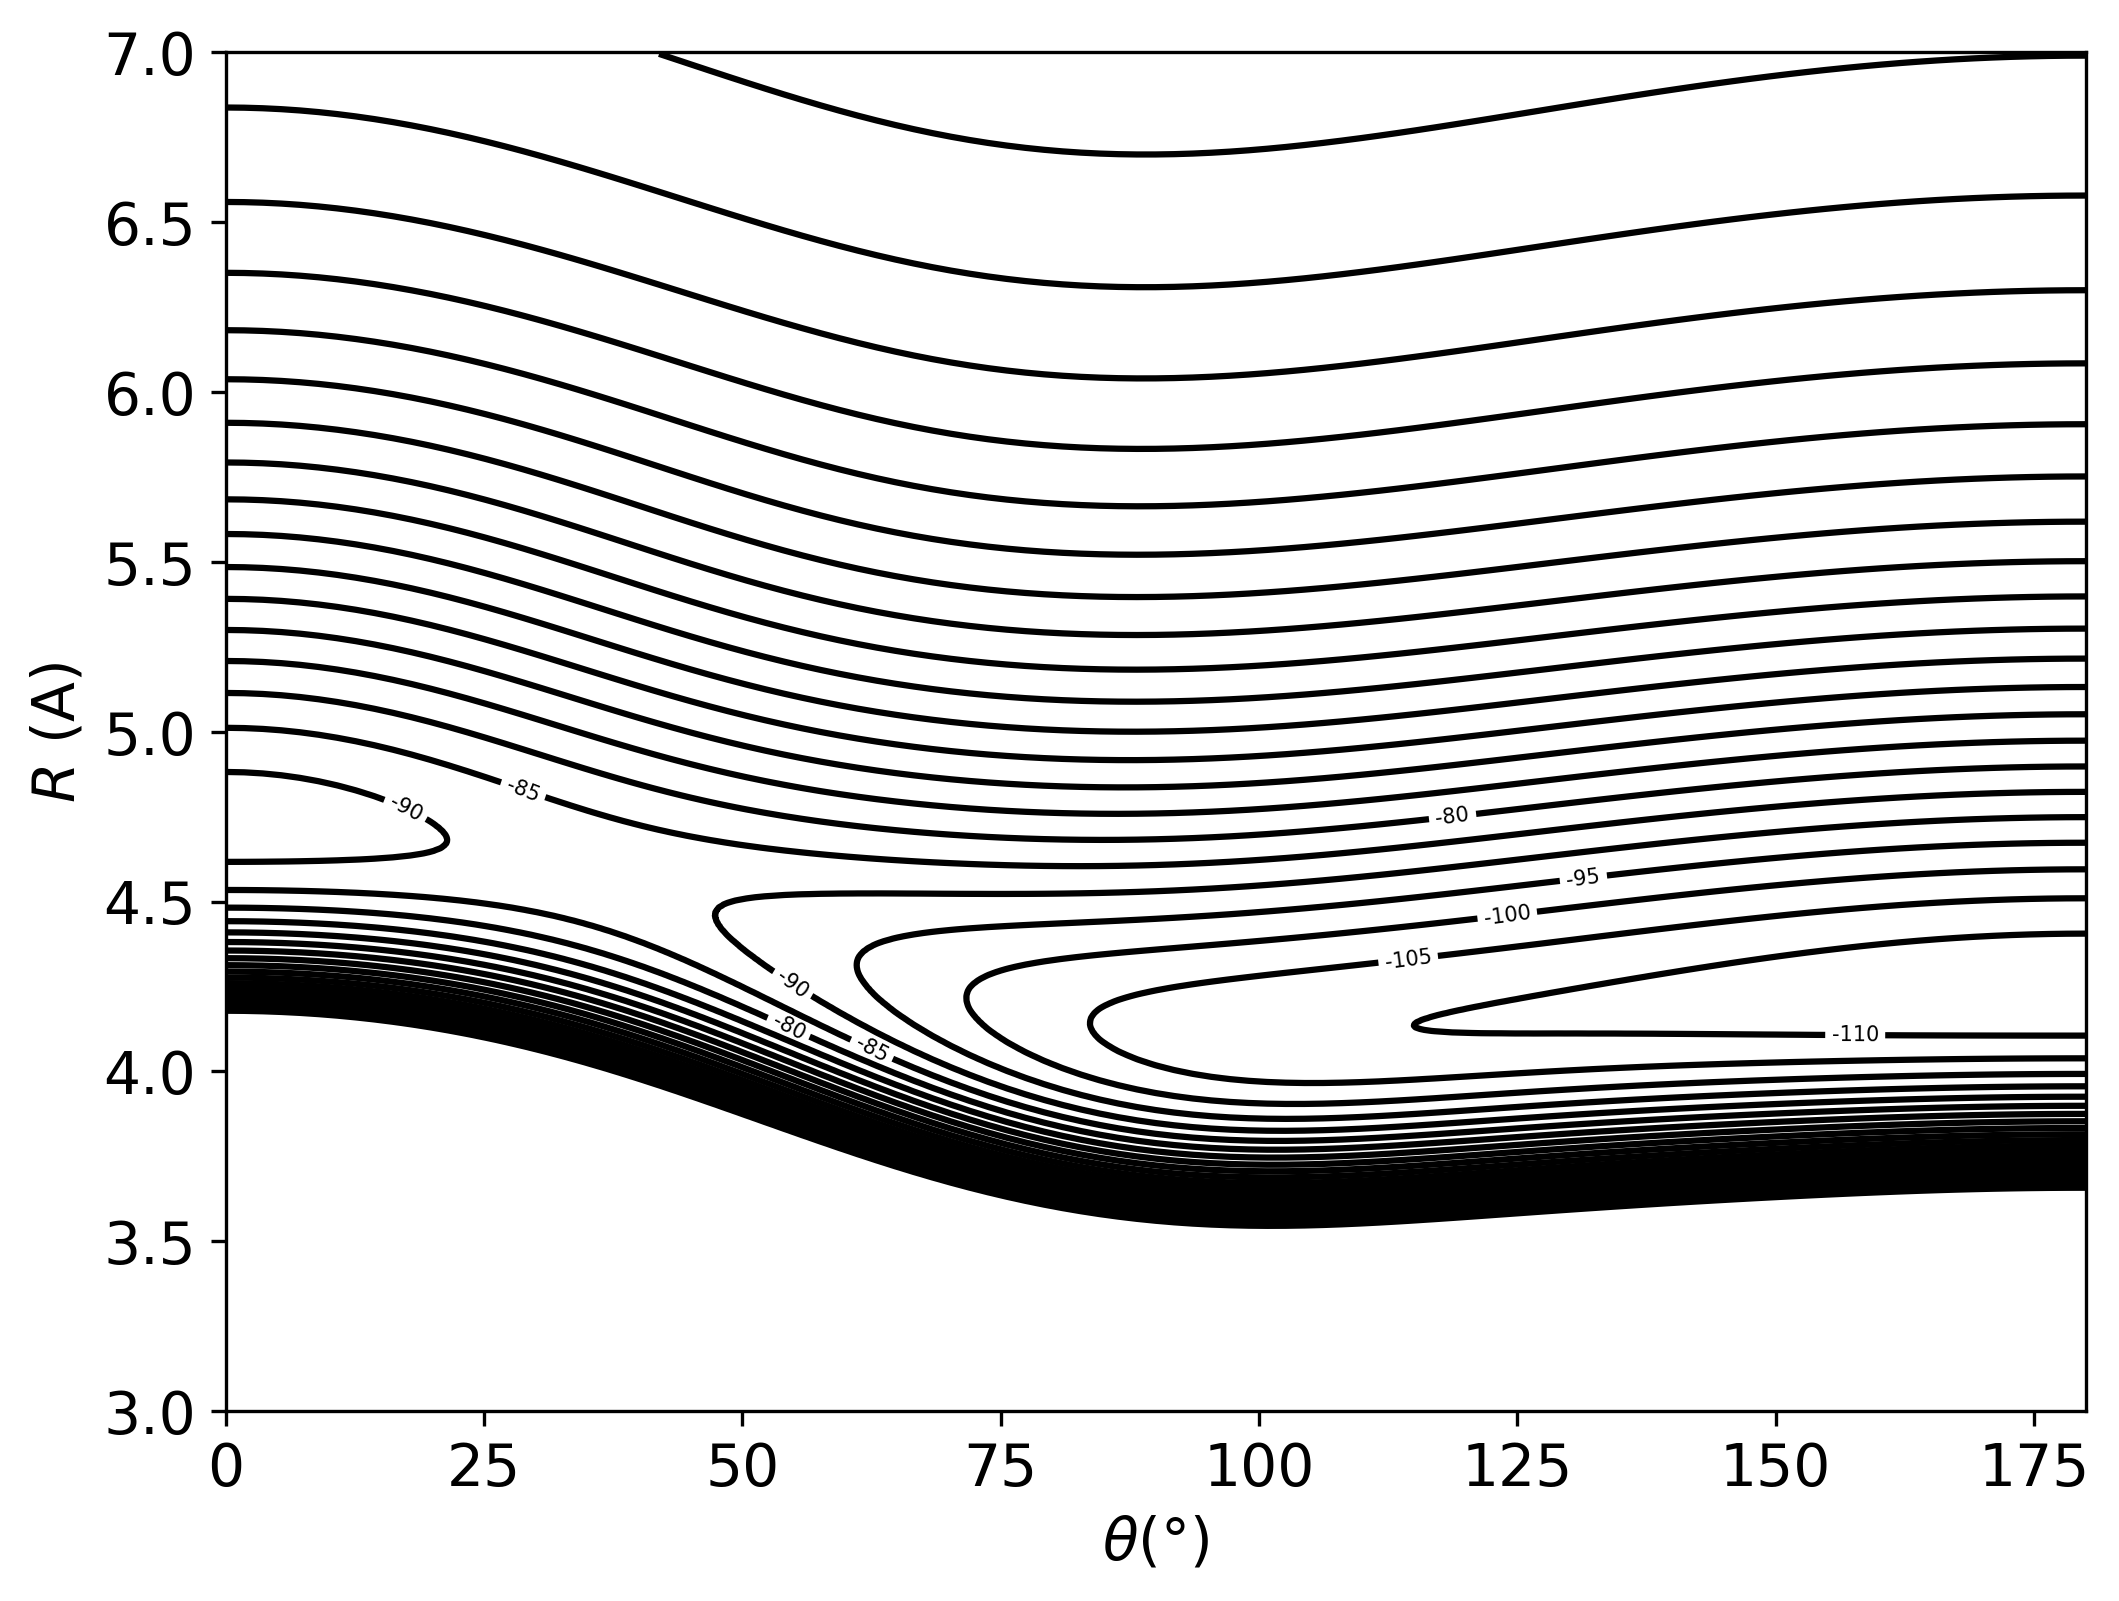

In [9]:
theta_p, r_p, v_p = theta[v < 0], r[v < 0], v[v < 0]
coef = 180 / np.pi
p = plt.tricontour(theta_p[r_p < 7] * coef, r_p[r_p < 7], v_p[r_p < 7], levels=np.linspace(-110, 0, 23), colors='black', linestyles='solid')
# plt.plot(theta[ind_min1] * coef, r[ind_min1], 'x', c='black')
# plt.plot(theta[ind_min2] * coef, r[ind_min2], 'x', c='black')
# plt.plot(1.8754889808102941 * coef, 3.897, '.', c='black')
labels = p.levels[:-16:]
print(labels)
plt.clabel(p, inline=1, fontsize=5, levels=labels, fmt='%d')
plt.ylim(3, 7)
plt.xlabel('$\\theta (\degree)$')
plt.ylabel('$R$ (A)')

In [6]:
%autoreload
pot2d = interp_pot2d(r, costheta, v)

In [7]:
%autoreload
N_R = 200
N_theta = 20
l = 1
K_max = 0
r_min = 2
r_max = 12

In [8]:
%autoreload
Rs_DVR, Xs_K = get_DVR_Rtheta(N_R, N_theta, 0, l=l, r_min=r_min, r_max=r_max, mol_params=mgnh_params)
Rs_angs = Rs_DVR * mgnh_params['S'] * au_to_angs
N_R_lim = Rs_angs.shape[0]
print(Rs_angs)
print(Rs_angs.shape)

[ 2.01506032  2.03525118  2.06267599  2.09738847  2.13940242  2.18872432
  2.24535877  2.30930998  2.38058226  2.45918016  2.54510861  2.63837292
  2.73897884  2.84693253  2.96224063  3.0849102   3.21494878  3.35236435
  3.49716536  3.64936073  3.80895986  3.97597261  4.15040932  4.33228083
  4.52159843  4.71837395  4.92261966  5.13434838  5.35357339  5.5803085
  5.81456804  6.05636684  6.30572027  6.56264421  6.82715509  7.09926988
  7.37900609  7.66638178  7.96141559  8.26412671  8.57453492  8.89266055
  9.21852455  9.55214847  9.89355445 10.24276524 10.59980424 10.96469546
 11.33746355 11.71813384]
(50,)


[ 5.14610951e+03  5.03147326e+03  4.87763779e+03  4.68547594e+03
  4.45695808e+03  4.19501742e+03  3.90168344e+03  3.58080308e+03
  3.23531115e+03  2.86833439e+03  2.48262570e+03  2.08400056e+03
  1.68600350e+03  1.30804969e+03  9.66532827e+02  6.71290398e+02
  4.27747198e+02  2.37066734e+02  9.59696510e+01 -1.71386011e+00
 -6.36828761e+01 -9.79796595e+01 -1.12016841e+02 -1.12289457e+02
 -1.04175816e+02 -9.18471662e+01 -7.81814248e+01 -6.46698266e+01
 -5.21684231e+01 -4.14499411e+01 -3.27603996e+01 -2.56476528e+01
 -1.98090730e+01 -1.51910352e+01 -1.16611598e+01 -8.99605220e+00
 -6.98007623e+00 -5.44530423e+00 -4.26892655e+00 -3.36182684e+00
 -2.65869266e+00 -2.11107833e+00 -1.68270420e+00 -1.34621270e+00
 -1.08084968e+00 -8.70774357e-01 -7.03858557e-01 -5.70764215e-01
 -4.64274050e-01 -3.78787930e-01  4.64472426e+03  4.56829469e+03
  4.46390876e+03  4.32904870e+03  4.16250668e+03  3.96333981e+03
  3.72933434e+03  3.45817975e+03  3.14858316e+03  2.80284718e+03
  2.42833104e+03  2.03811

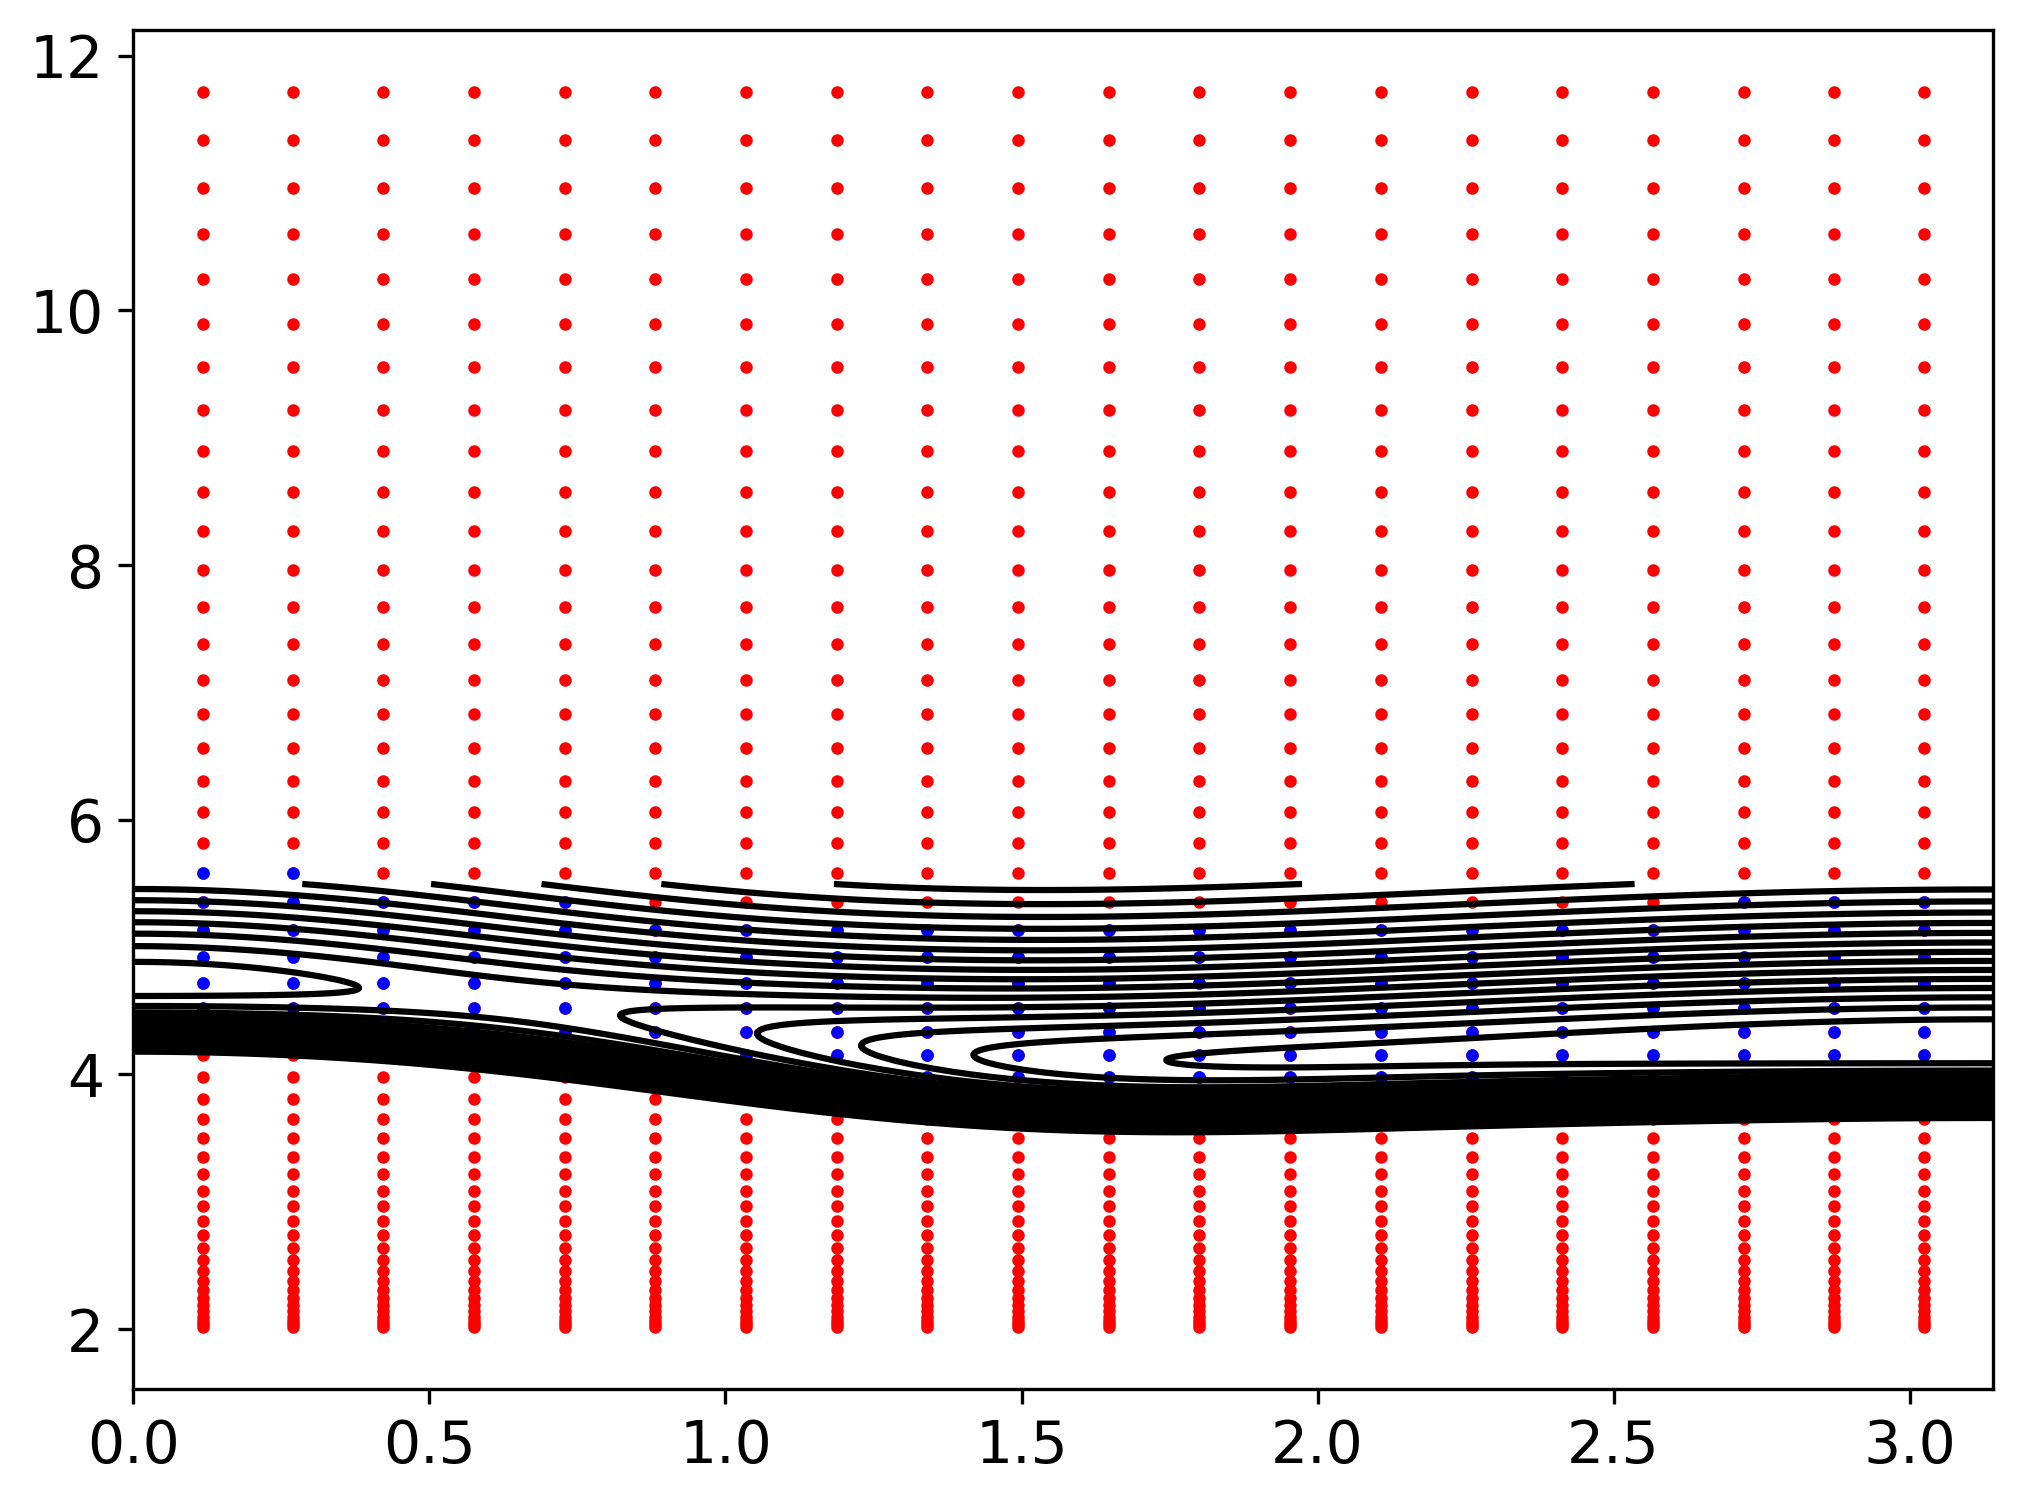

In [9]:
p = plt.tricontour(theta_p[r_p < 5.5], r_p[r_p < 5.5], v_p[r_p < 5.5], levels=np.linspace(np.min(v), 0, 25), colors='black', linestyles='solid')

Rs_grid, Xs_grid = np.meshgrid(Rs_angs, Xs_K[0])
Rs_grid, Xs_grid = Rs_grid.flatten(), Xs_grid.flatten()
Vs = pot2d(Rs_grid, Xs_grid)
plt.scatter(np.arccos(Xs_grid), Rs_grid, s=4, c='r')
plt.scatter(np.arccos(Xs_grid[Vs < -50]), Rs_grid[Vs < -50], s=4, c='b')
print(Vs)

[-88.22685205 -63.60267907 -55.46092943 -41.50245874 -33.07370066] [-9.10530569e-10  2.25019735e-09  2.45807051e-09  2.84846264e-09
 -3.07379742e-09 -3.25889866e-09 -3.41616071e-09  3.56885150e-09
  3.73587841e-09  3.93585852e-09 -4.18995532e-09 -4.54408512e-09
 -4.47503478e-09 -1.72920897e-08 -2.27080267e-07  3.63175748e-06
 -4.20710279e-05 -3.52335691e-04  2.07983042e-03 -8.56274607e-03
  2.45895629e-02  4.97292846e-02 -7.20529388e-02  7.65420571e-02
  6.12565521e-02 -3.80318813e-02  1.88659695e-02  7.68404840e-03
 -2.63481958e-03  7.79251025e-04 -2.03044661e-04 -4.74044244e-05
  9.98640301e-06 -1.95921351e-06 -3.21915592e-07  8.04591379e-08
  1.41430111e-08 -2.42035437e-08 -2.26918355e-08 -2.28739720e-08
 -2.28573087e-08  2.28869148e-08  2.29278289e-08  2.29829286e-08
 -2.30541504e-08 -2.31491661e-08 -2.32862961e-08  2.35232375e-08
  2.38901389e-08  2.81923757e-08 -1.37945728e-09  3.47116503e-09
  3.78227911e-09  4.40251065e-09 -4.74576953e-09 -5.02036240e-09
 -5.24315603e-09  5.456

<BarContainer object of 1000 artists>

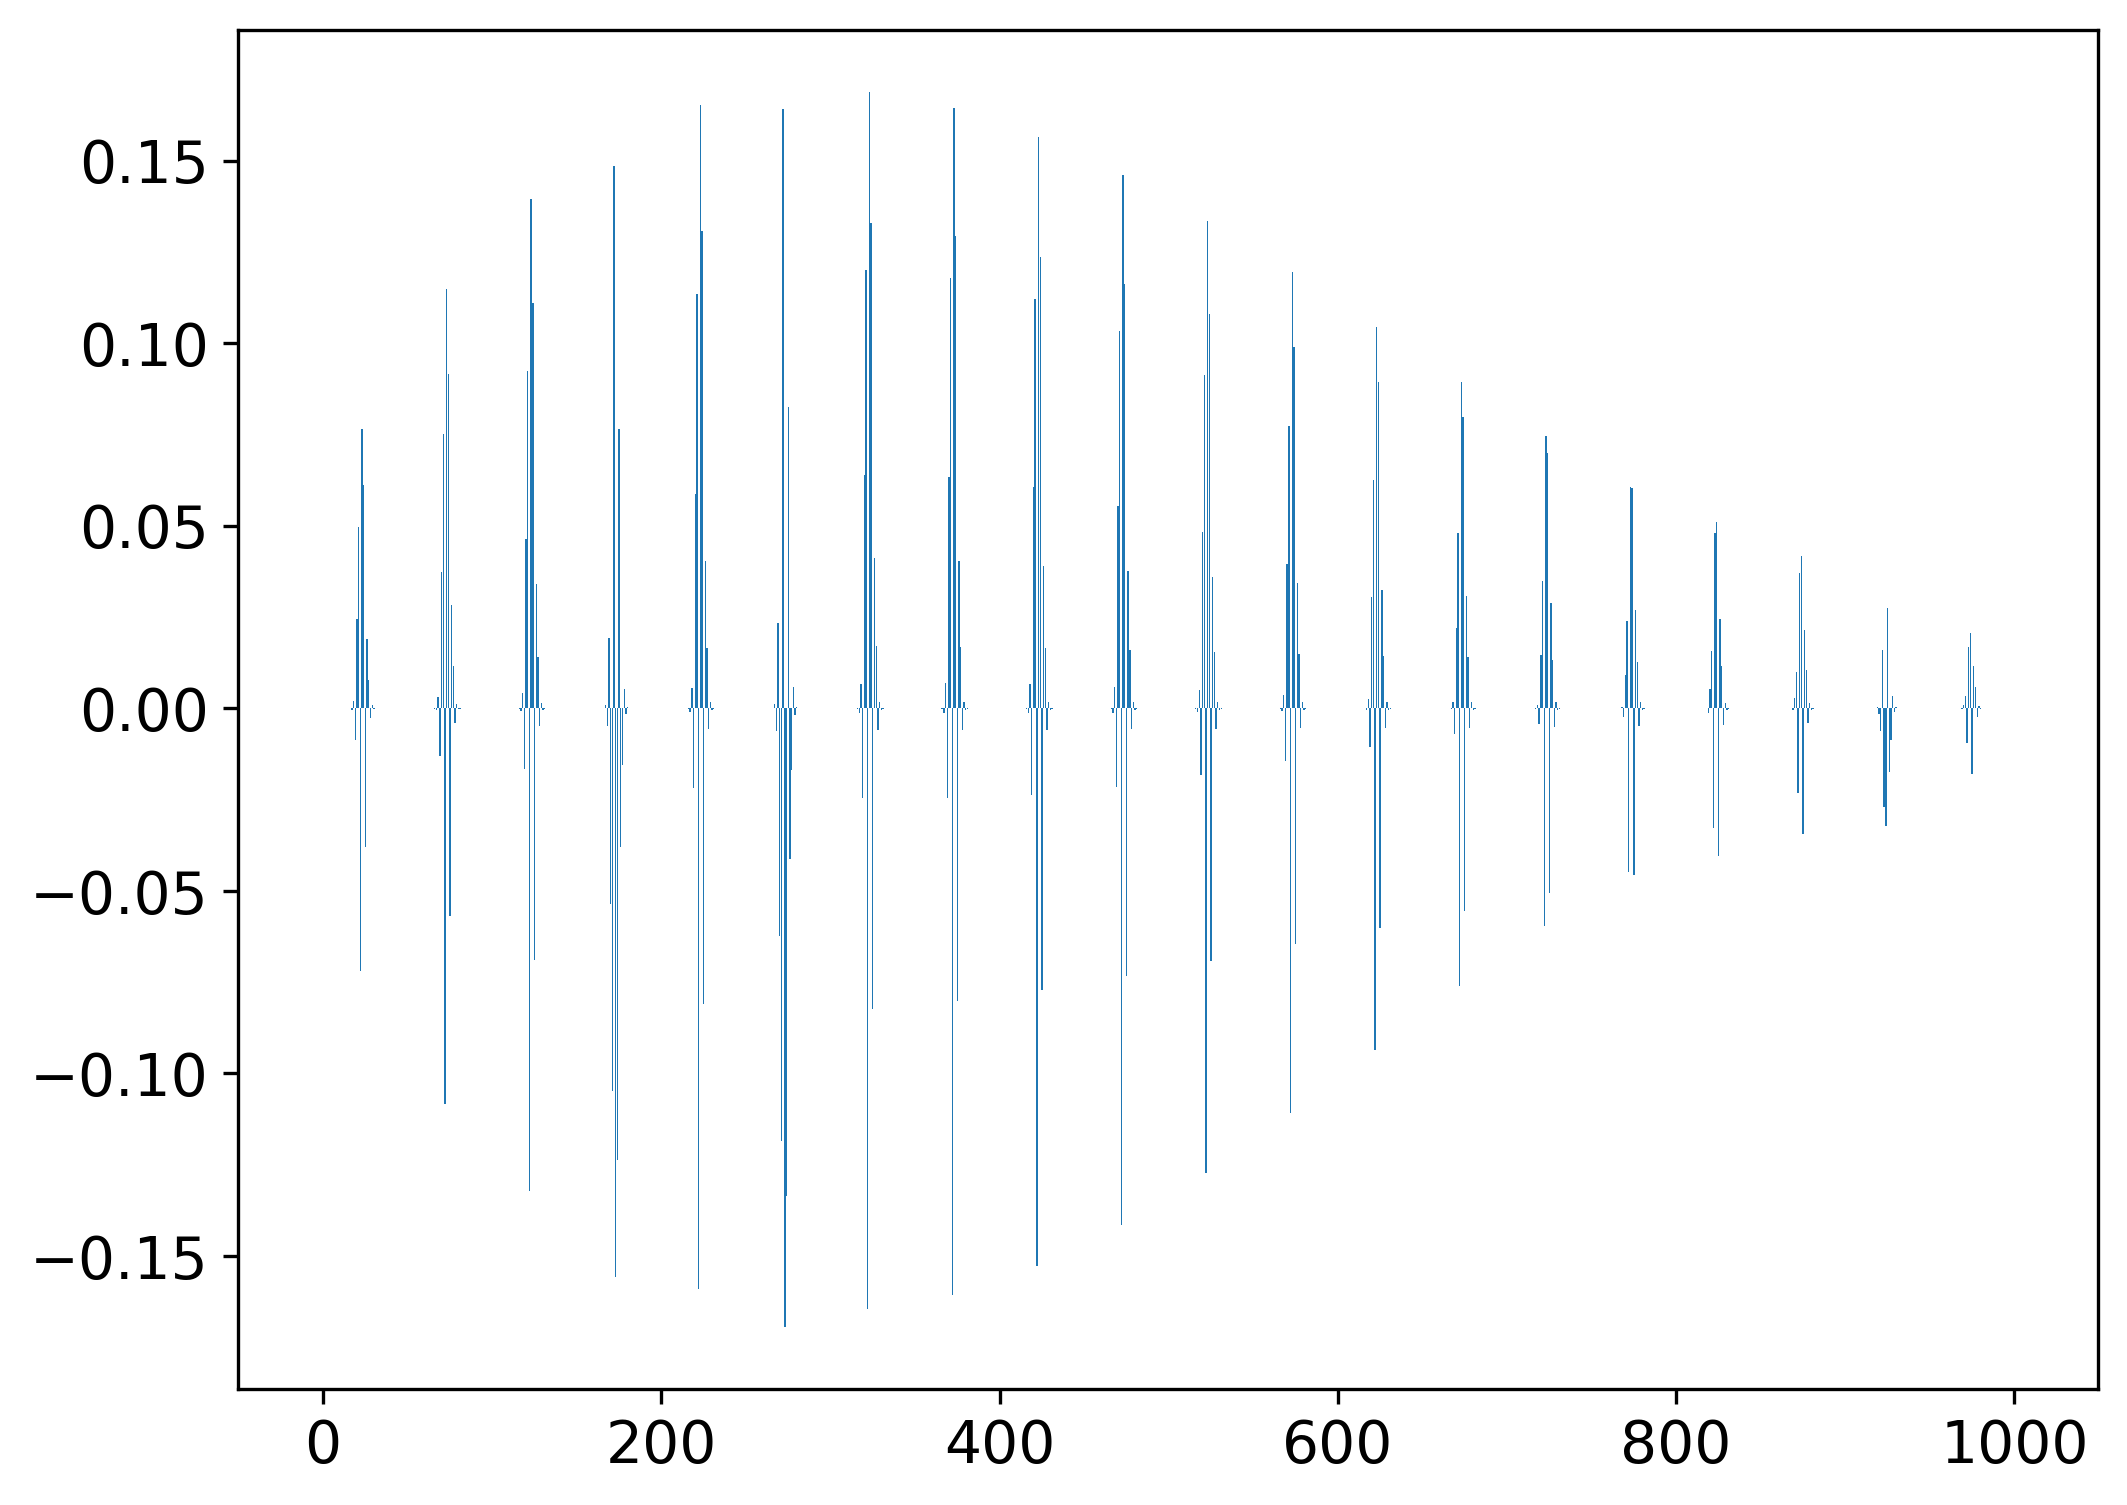

In [10]:
%autoreload
h_dvr = get_ham_DVR(pot2d, N_R, N_theta, 0, 0, l=l, r_min=r_min, r_max=r_max, trunc=0, mol_params=mgnh_params)
eigvals, eigvecs = np.linalg.eigh(h_dvr)
print(eigvals[:5] * hartree, eigvecs.T[0])
plt.bar(range(eigvecs.shape[1]), eigvecs.T[0])

-87.80807999716625 [ 0.14311483 -0.00932867  0.21489295 -0.01209289  0.26172029 -0.01073556
 -0.29311777  0.00588232  0.31222451  0.00205681 -0.32061914 -0.01263961
  0.31935735  0.02486877  0.30947419 -0.03652335  0.2924324  -0.04417837
  0.2701887  -0.0445841   0.2445576   0.03677865 -0.2166669   0.02286562
  0.18738039  0.00663085 -0.15799555 -0.0083754   0.13023251 -0.01996144
  0.10557607  0.02722918  0.08460099  0.03019774 -0.06672688 -0.02935498
 -0.05030246 -0.02513729  0.03197206  0.01704967]


<BarContainer object of 40 artists>

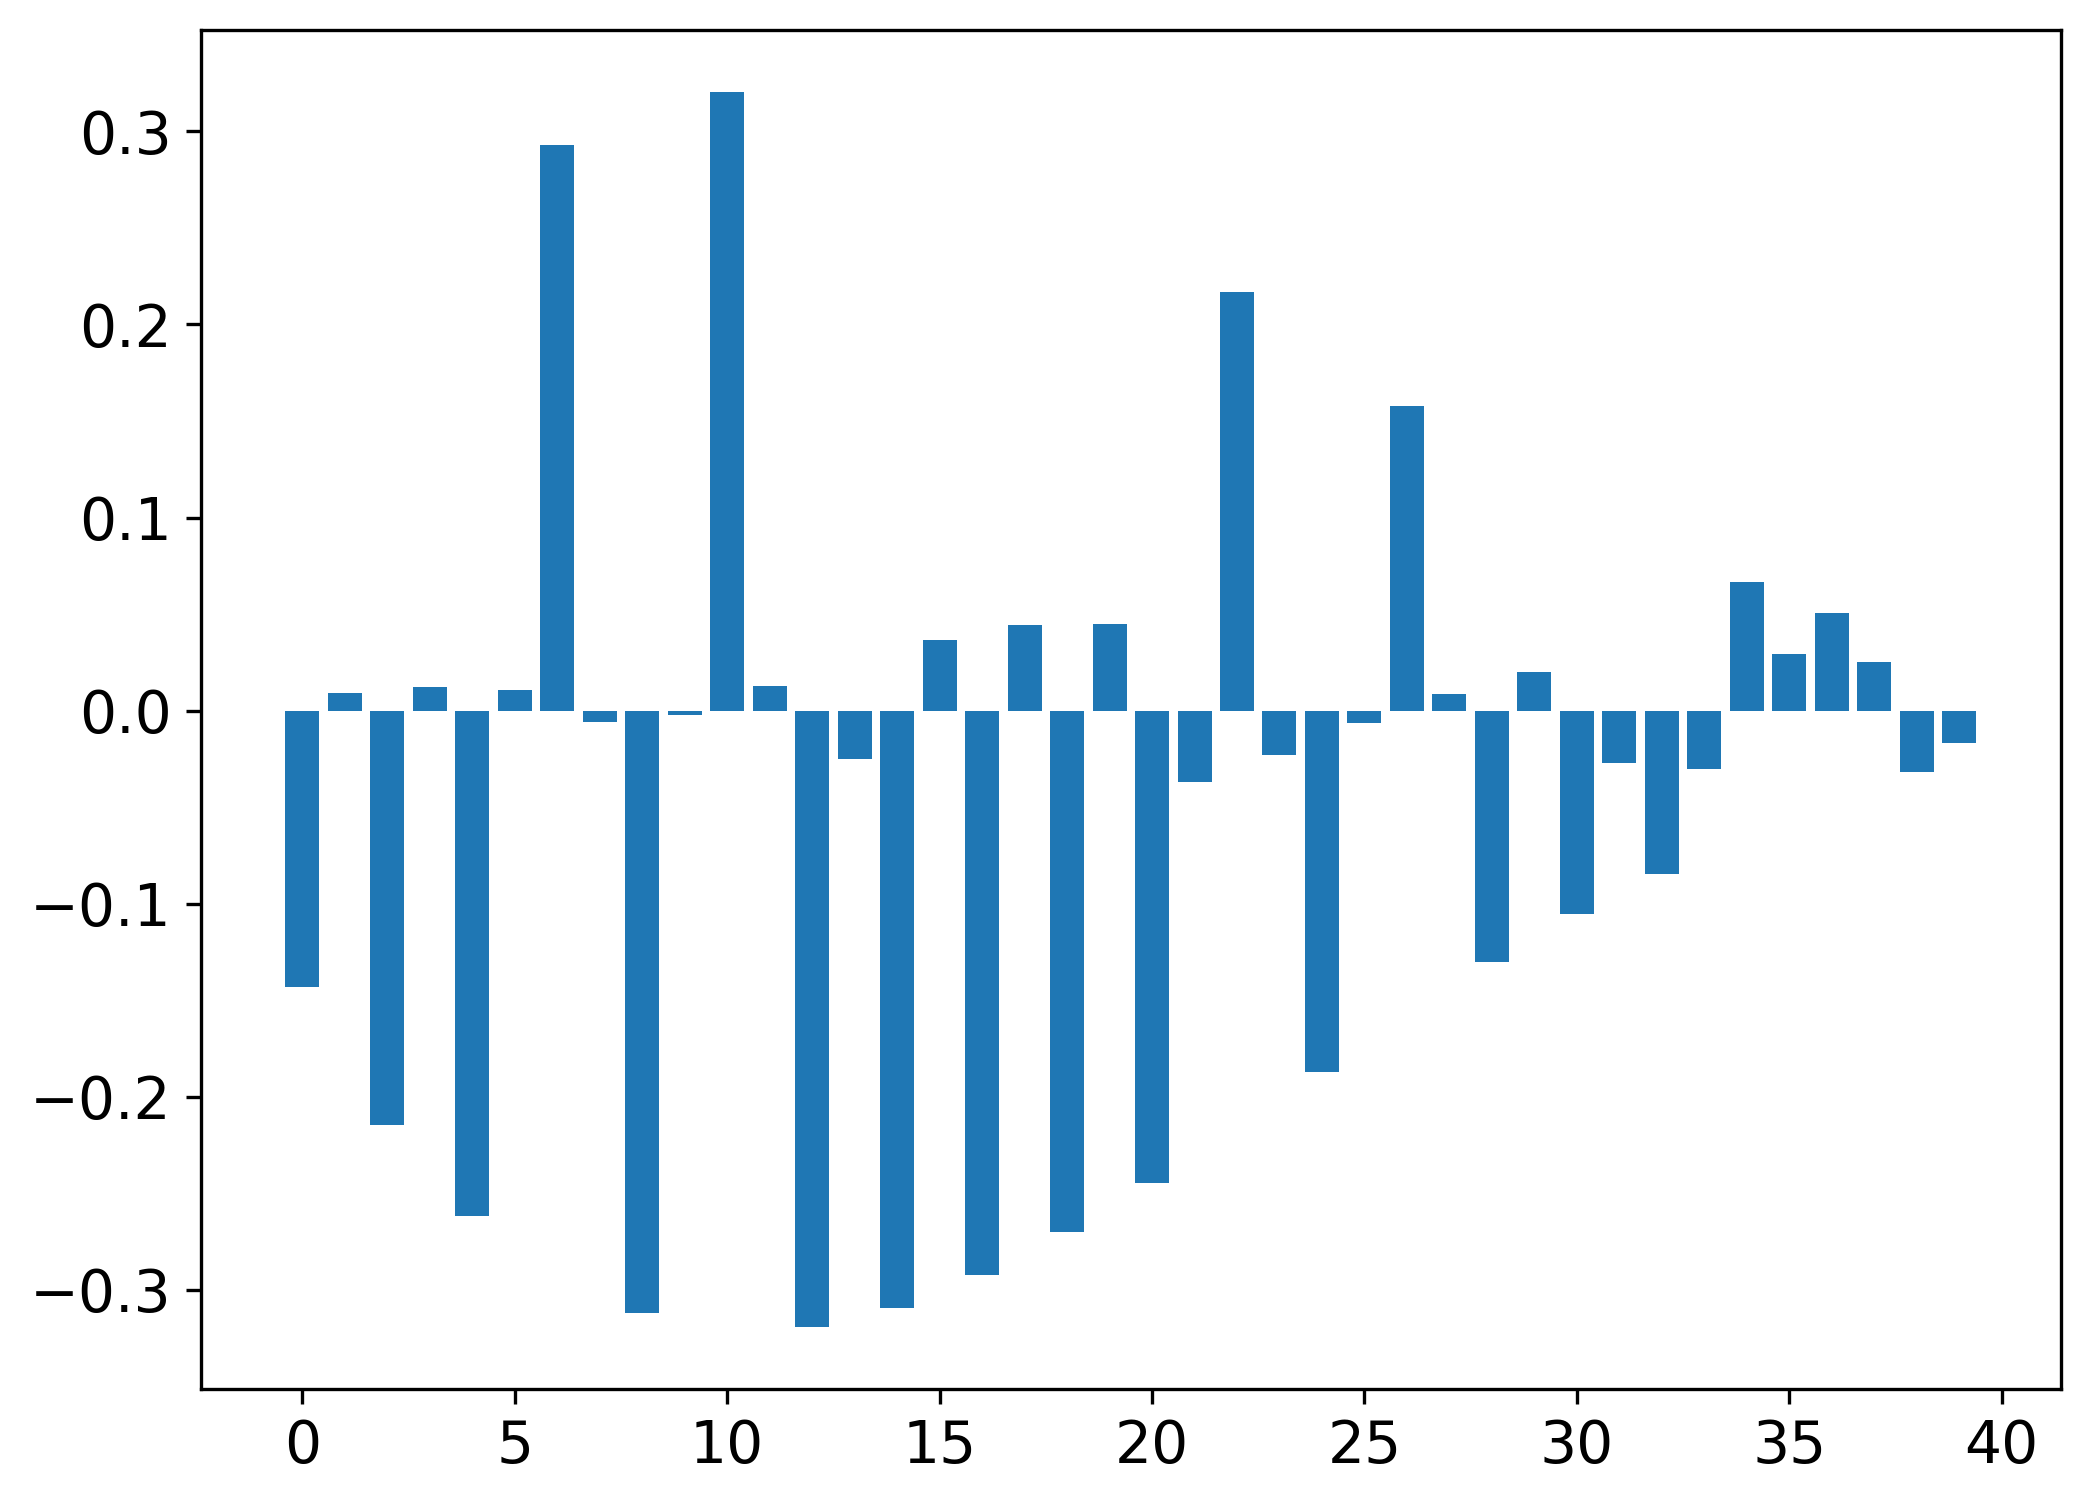

In [18]:
h_dvr = get_ham_DVR(pot2d, N_R, N_theta, 0, 0, l=l, r_min=r_min, r_max=r_max, trunc=2, mol_params=mgnh_params)
eigvals, eigvecs = np.linalg.eigh(h_dvr)
print(eigvals[0] * hartree, eigvecs.T[0])
plt.bar(range(eigvecs.shape[1]), -eigvecs.T[0])

In [38]:
%autoreload
N_R = 200
N_theta = 20
l = 1
K_max = 0

r_min = 2.0
r_max = 12

Rs_DVR, Xs_K = get_DVR_Rtheta(N_R, N_theta, 0, l=l, r_min=r_min, r_max=r_max, mol_params=mgnh_params)
N_R_lim = Rs_DVR.shape[0]
h_dvr = get_ham_DVR(pot2d, N_R, N_theta, 0, 0, l=l, r_min=r_min, r_max=r_max, trunc=0, mol_params=mgnh_params)
eigvals, eigvecs = np.linalg.eigh(h_dvr)
print(f'[{r_min:.1f}, {r_max:.1f}], N_R = {N_R_lim}, N_theta = {N_theta}: {eigvals[0] * hartree}')
ref_energy = eigvals[0] * hartree

[2.0, 12.0], N_R = 50, N_theta = 20: -88.22685204564539


In [39]:
for i in range(10):
    print(f'E{i} - E0 = {eigvals[i] * hartree - ref_energy}')

E0 - E0 = 0.0
E1 - E0 = 24.624172977307794
E2 - E0 = 32.765922620088844
E3 - E0 = 46.72439330163547
E4 - E0 = 55.15315138354424
E5 - E0 = 64.82959844105201
E6 - E0 = 72.57017077855305
E7 - E0 = 78.27486067804483
E8 - E0 = 82.46321288368544
E9 - E0 = 84.69712628185802


In [40]:
%autoreload
N_R = 200
N_theta = 10
l = 1
K_max = 0

r_min = 3.0
r_max_list = [4, 4.5, 5, 6, 7, 8, 10, 12]
for r_max in r_max_list:
    Rs_DVR, Xs_K = get_DVR_Rtheta(N_R, N_theta, 0, l=l, r_min=r_min, r_max=r_max, mol_params=mgnh_params)
    N_R_lim = Rs_DVR.shape[0]
    h_dvr = get_ham_DVR(pot2d, N_R, N_theta, 0, 0, l=l, r_min=r_min, r_max=r_max, trunc=0, mol_params=mgnh_params)
    eigvals, eigvecs = np.linalg.eigh(h_dvr)
    print(f'[{r_min:.1f}, {r_max:.1f}], N_R = {N_R_lim}, N_theta = {N_theta}: {eigvals[0] * hartree:.5f}, diff = {eigvals[0] * hartree - ref_energy:.5f}')

[3.0, 4.0], N_R = 15, N_theta = 10: -13.88456, diff = 74.34229
[3.0, 4.5], N_R = 19, N_theta = 10: -81.12415, diff = 7.10270
[3.0, 5.0], N_R = 22, N_theta = 10: -87.94911, diff = 0.27774
[3.0, 6.0], N_R = 27, N_theta = 10: -88.22660, diff = 0.00025
[3.0, 7.0], N_R = 31, N_theta = 10: -88.22661, diff = 0.00024
[3.0, 8.0], N_R = 35, N_theta = 10: -88.22661, diff = 0.00024
[3.0, 10.0], N_R = 42, N_theta = 10: -88.22661, diff = 0.00024
[3.0, 12.0], N_R = 48, N_theta = 10: -88.22661, diff = 0.00024


In [41]:
%autoreload
N_R = 200
N_theta = 20
l = 1
K_max = 0

r_min = 3.0
r_max_list = [4, 4.5, 5, 6, 7, 8, 10, 12]
for r_max in r_max_list:
    Rs_DVR, Xs_K = get_DVR_Rtheta(N_R, N_theta, 0, l=l, r_min=r_min, r_max=r_max, mol_params=mgnh_params)
    N_R_lim = Rs_DVR.shape[0]
    h_dvr = get_ham_DVR(pot2d, N_R, N_theta, 0, 0, l=l, r_min=r_min, r_max=r_max, trunc=0, mol_params=mgnh_params)
    eigvals, eigvecs = np.linalg.eigh(h_dvr)
    print(f'[{r_min:.1f}, {r_max:.1f}], N_R = {N_R_lim}, N_theta = {N_theta}: {eigvals[0] * hartree:.5f}, diff = {eigvals[0] * hartree - ref_energy:.5f}')

[3.0, 4.0], N_R = 15, N_theta = 20: -13.88470, diff = 74.34215
[3.0, 4.5], N_R = 19, N_theta = 20: -81.12443, diff = 7.10242
[3.0, 5.0], N_R = 22, N_theta = 20: -87.94931, diff = 0.27754
[3.0, 6.0], N_R = 27, N_theta = 20: -88.22679, diff = 0.00006
[3.0, 7.0], N_R = 31, N_theta = 20: -88.22680, diff = 0.00005
[3.0, 8.0], N_R = 35, N_theta = 20: -88.22680, diff = 0.00005
[3.0, 10.0], N_R = 42, N_theta = 20: -88.22680, diff = 0.00005
[3.0, 12.0], N_R = 48, N_theta = 20: -88.22680, diff = 0.00005


In [42]:
%autoreload
N_R = 200
N_theta = 10
l = 1
K_max = 0

r_min_list = [2.0, 3.0, 3.2, 3.4, 3.6, 3.8, 4]
r_max = 6
for r_min in r_min_list:
    Rs_DVR, Xs_K = get_DVR_Rtheta(N_R, N_theta, 0, l=l, r_min=r_min, r_max=r_max, mol_params=mgnh_params)
    N_R_lim = Rs_DVR.shape[0]
    h_dvr = get_ham_DVR(pot2d, N_R, N_theta, 0, 0, l=l, r_min=r_min, r_max=r_max, trunc=0, mol_params=mgnh_params)
    eigvals, eigvecs = np.linalg.eigh(h_dvr)
    print(f'[{r_min:.1f}, {r_max:.1f}], N_R = {N_R_lim}, N_theta = {N_theta}: {eigvals[0] * hartree:.5f}, diff = {eigvals[0] * hartree - ref_energy:.5f}')

[2.0, 6.0], N_R = 31, N_theta = 10: -88.22676, diff = 0.00009
[3.0, 6.0], N_R = 27, N_theta = 10: -88.22660, diff = 0.00025
[3.2, 6.0], N_R = 26, N_theta = 10: -88.22657, diff = 0.00028
[3.4, 6.0], N_R = 25, N_theta = 10: -88.21524, diff = 0.01161
[3.6, 6.0], N_R = 24, N_theta = 10: -87.86149, diff = 0.36536
[3.8, 6.0], N_R = 23, N_theta = 10: -85.33243, diff = 2.89442
[4.0, 6.0], N_R = 22, N_theta = 10: -78.83313, diff = 9.39373


In [43]:
%autoreload
N_R = 200
l = 1
K_max = 0

r_min = 3.0
r_max_list = 6
N_thetas = [20, 10, 8, 5, 4, 3, 2]
for N_theta in N_thetas:
    Rs_DVR, Xs_K = get_DVR_Rtheta(N_R, N_theta, 0, l=l, r_min=r_min, r_max=r_max, mol_params=mgnh_params)
    N_R_lim = Rs_DVR.shape[0]
    h_dvr = get_ham_DVR(pot2d, N_R, N_theta, 0, 0, l=l, r_min=r_min, r_max=r_max, trunc=0, mol_params=mgnh_params)
    eigvals, eigvecs = np.linalg.eigh(h_dvr)
    print(f'[{r_min:.1f}, {r_max:.1f}], N_R = {N_R_lim}, N_theta = {N_theta}: {eigvals[0] * hartree:.5f}, diff = {eigvals[0] * hartree - ref_energy:.5f}')

[3.0, 6.0], N_R = 27, N_theta = 20: -88.22679, diff = 0.00006
[3.0, 6.0], N_R = 27, N_theta = 10: -88.22660, diff = 0.00025
[3.0, 6.0], N_R = 27, N_theta = 8: -88.22712, diff = -0.00027
[3.0, 6.0], N_R = 27, N_theta = 5: -88.22580, diff = 0.00105
[3.0, 6.0], N_R = 27, N_theta = 4: -88.24451, diff = -0.01766
[3.0, 6.0], N_R = 27, N_theta = 3: -88.24700, diff = -0.02014
[3.0, 6.0], N_R = 27, N_theta = 2: -87.79564, diff = 0.43122


In [44]:
%autoreload

N_R = 200
N_theta = 8
l = 1
K_max = 0

r_min = 3.0
r_max = 6
truncs = [0, 20, 10, 5, 3, 2, 1]
for t in truncs:
    Rs_DVR, Xs_K = get_DVR_Rtheta(N_R, N_theta, 0, l=l, r_min=r_min, r_max=r_max, mol_params=mgnh_params)
    N_R_lim = Rs_DVR.shape[0]
    h_dvr = get_ham_DVR(pot2d, N_R, N_theta, 0, 0, l=l, r_min=r_min, r_max=r_max, trunc=t, mol_params=mgnh_params)
    eigvals, eigvecs = np.linalg.eigh(h_dvr)
    print(f'[{r_min:.1f}, {r_max:.1f}], N_R = {N_R_lim}, P = {t if t != 0 else N_R_lim}, N_theta = {N_theta}: {eigvals[0] * hartree:.5f}, diff = {eigvals[0] * hartree - ref_energy:.5f}')

[3.0, 6.0], N_R = 27, P = 27, N_theta = 8: -88.22712, diff = -0.00027
[3.0, 6.0], N_R = 27, P = 20, N_theta = 8: -88.22712, diff = -0.00027
[3.0, 6.0], N_R = 27, P = 10, N_theta = 8: -88.22688, diff = -0.00003
[3.0, 6.0], N_R = 27, P = 5, N_theta = 8: -88.18915, diff = 0.03771
[3.0, 6.0], N_R = 27, P = 3, N_theta = 8: -88.03290, diff = 0.19395
[3.0, 6.0], N_R = 27, P = 2, N_theta = 8: -87.82035, diff = 0.40650
[3.0, 6.0], N_R = 27, P = 1, N_theta = 8: -86.67929, diff = 1.54756


In [45]:
%autoreload

N_R = 200
l = 1
K_max = 0

r_min = 3.0
r_max = 12
t = 0
N_thetas = [20, 10, 8, 5, 4, 3, 2]
for N_theta in N_thetas:
    Rs_DVR, Xs_K = get_DVR_Rtheta(N_R, N_theta, 0, l=l, r_min=r_min, r_max=r_max, mol_params=mgnh_params)
    N_R_lim = Rs_DVR.shape[0]
    h_dvr = get_ham_DVR(pot2d, N_R, N_theta, 0, 0, l=l, r_min=r_min, r_max=r_max, trunc=t, mol_params=mgnh_params)
    eigvals, eigvecs = np.linalg.eigh(h_dvr)
    print(f'[{r_min:.1f}, {r_max:.1f}], N_R = {N_R_lim}, P = {t if t != 0 else N_R_lim}, N_theta = {N_theta}: {eigvals[0] * hartree:.5f}, diff = {eigvals[0] * hartree - ref_energy:.5f}')

[3.0, 12.0], N_R = 48, P = 48, N_theta = 20: -88.22680, diff = 0.00005
[3.0, 12.0], N_R = 48, P = 48, N_theta = 10: -88.22661, diff = 0.00024
[3.0, 12.0], N_R = 48, P = 48, N_theta = 8: -88.22713, diff = -0.00028
[3.0, 12.0], N_R = 48, P = 48, N_theta = 5: -88.22581, diff = 0.00104
[3.0, 12.0], N_R = 48, P = 48, N_theta = 4: -88.24452, diff = -0.01767
[3.0, 12.0], N_R = 48, P = 48, N_theta = 3: -88.24701, diff = -0.02015
[3.0, 12.0], N_R = 48, P = 48, N_theta = 2: -87.79565, diff = 0.43121


In [46]:
%autoreload
N_R = 200
N_theta = 10
l = 1
K_max = 0
P = 0
r_min = 3.0
r_max = 6.0

Rs_DVR, Xs_K = get_DVR_Rtheta(N_R, N_theta, 0, l=l, r_min=r_min, r_max=r_max, mol_params=mgnh_params)
N_R_lim = Rs_DVR.shape[0]
h_dvr = get_ham_DVR(pot2d, N_R, N_theta, 0, 0, l=l, r_min=r_min, r_max=r_max, trunc=P, mol_params=mgnh_params)
eigvals, eigvecs = np.linalg.eigh(h_dvr)
# print(f'[{r_min:.1f}, {r_max:.1f}], N_R = {N_R_lim}, N_theta = {N_theta}: {eigvals[0] * hartree}, diff = {eigvals[0] * hartree - ref_energy:.5f}')

-88.22659880815701 [-2.63161666e-07 -9.62552314e-07  2.05247801e-06 -5.23881823e-06
 -1.26405886e-05  3.40066971e-05 -9.34340905e-05 -2.64623736e-04
  7.42160196e-04 -2.01683522e-03 -5.15988911e-03  1.21334162e-02
 -2.56339532e-02  4.77430362e-02  7.71852198e-02 -1.07092164e-01
  1.26590361e-01  1.27074762e-01 -1.08369176e-01  7.88039203e-02
 -4.91682955e-02 -2.65340789e-02  1.24913986e-02 -5.18082109e-03
 -1.90955606e-03  6.30370796e-04 -1.68458996e-04  4.98203545e-07
  1.74520814e-06 -3.80152427e-06  9.46349873e-06  2.26309559e-05
 -5.96073969e-05  1.60656284e-04  4.45165105e-04 -1.22142744e-03
  3.24672850e-03  8.13011831e-03 -1.87320149e-02  3.88355334e-02
 -7.11143653e-02 -1.13289608e-01  1.55284776e-01 -1.81832074e-01
 -1.81306292e-01  1.53974424e-01 -1.11744134e-01  6.97037820e-02
  3.76646196e-02 -1.77814261e-02  7.40613884e-03  2.74363884e-03
 -9.10446904e-04  2.44383726e-04  7.87555691e-07  2.63985670e-06
 -5.87771925e-06  1.42465495e-05  3.37184800e-05 -8.66850878e-05
  2.28

<BarContainer object of 270 artists>

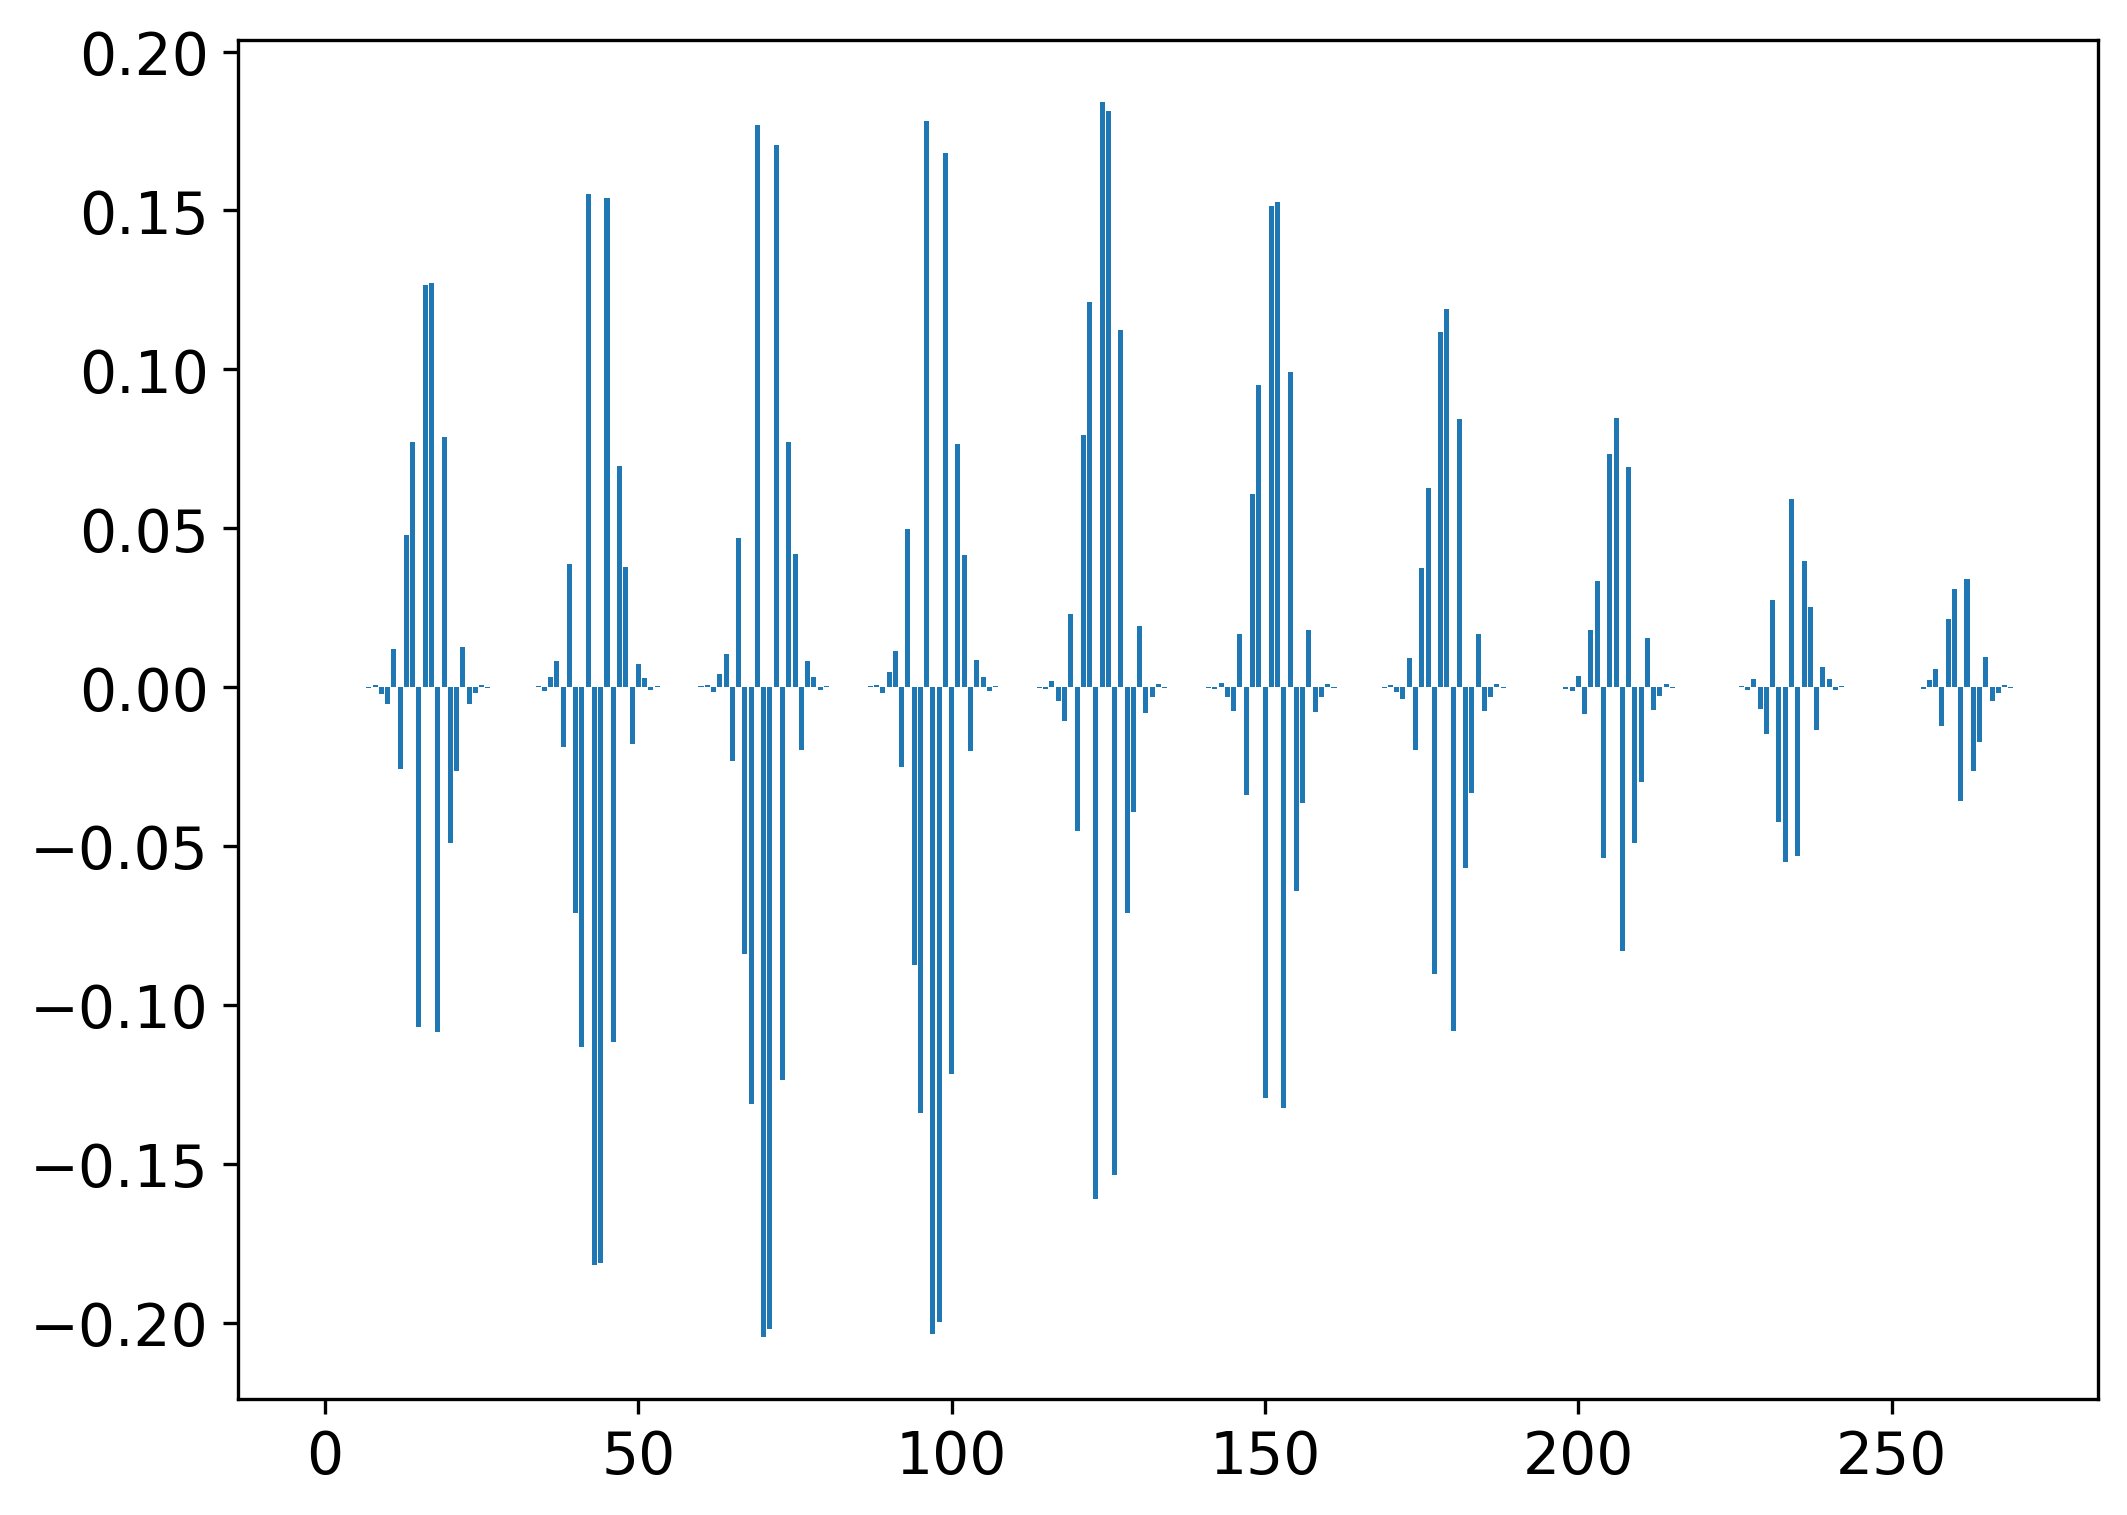

In [47]:
eigvals, eigvecs = np.linalg.eigh(h_dvr)
print(eigvals[0] * hartree, eigvecs.T[0])
plt.bar(range(eigvecs.shape[1]), eigvecs.T[0])

In [48]:
vec = eigvecs.T[0]
vec = vec.reshape((P if P > 0 else N_R_lim, N_theta))
# vec = vec.reshape(-1)

<BarContainer object of 27 artists>

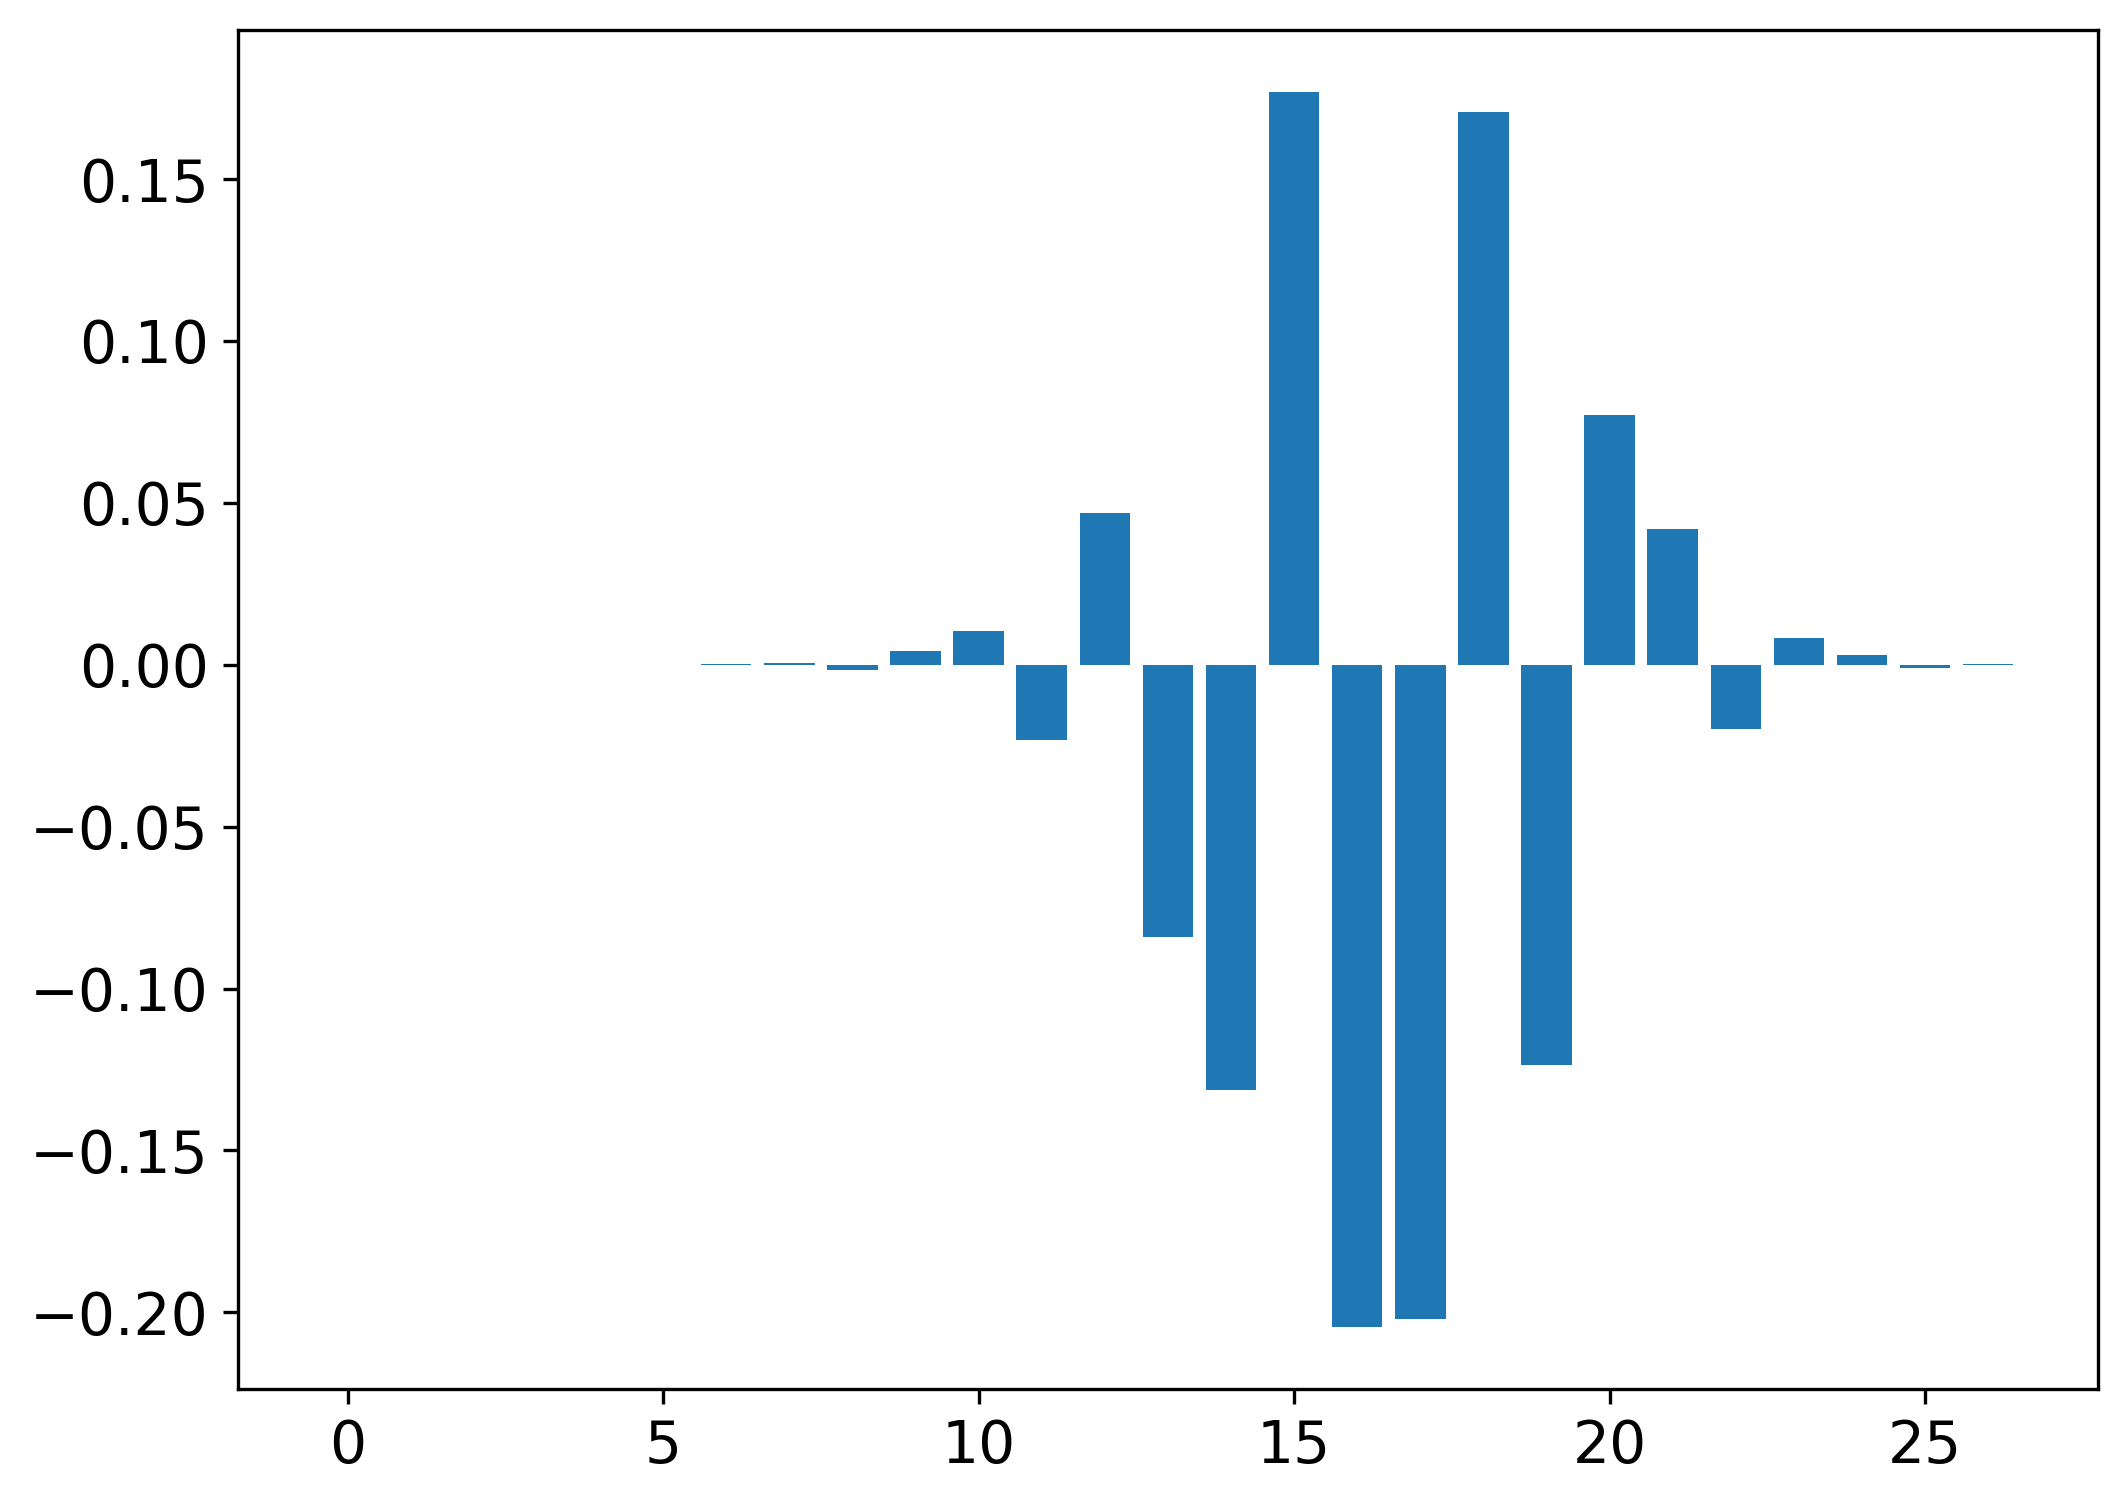

In [49]:
i = 2
plt.bar(range(N_R_lim), eigvecs.T[0][i * N_R_lim:(i+1) * N_R_lim])


In [50]:
eigvecs.T[0].shape

(270,)

In [51]:
np.linspace(np.arccos(Xs_K[0])[-1], np.pi, 24 * 12).shape

(288,)

In [52]:
%autoreload
P = 5

# Rs_DVR5, Xs_K5 = get_DVR_Rtheta(N_R, N_theta, 0, l=l, r_min=r_min, r_max=r_max)
# N_R_lim5 = Rs_DVR.shape[0]
h_dvr5 = get_ham_DVR(pot2d, N_R, N_theta, 0, 0, l=l, r_min=r_min, r_max=r_max, trunc=P, mol_params=mgnh_params)
eigvals5, eigvecs5 = np.linalg.eigh(h_dvr5)
# print(f'[{r_min:.1f}, {r_max:.1f}], N_R = {N_R_lim}, N_theta = {N_theta}: {eigvals[0] * hartree}, diff = {eigvals[0] * hartree - ref_energy:.5f}')

<BarContainer object of 50 artists>

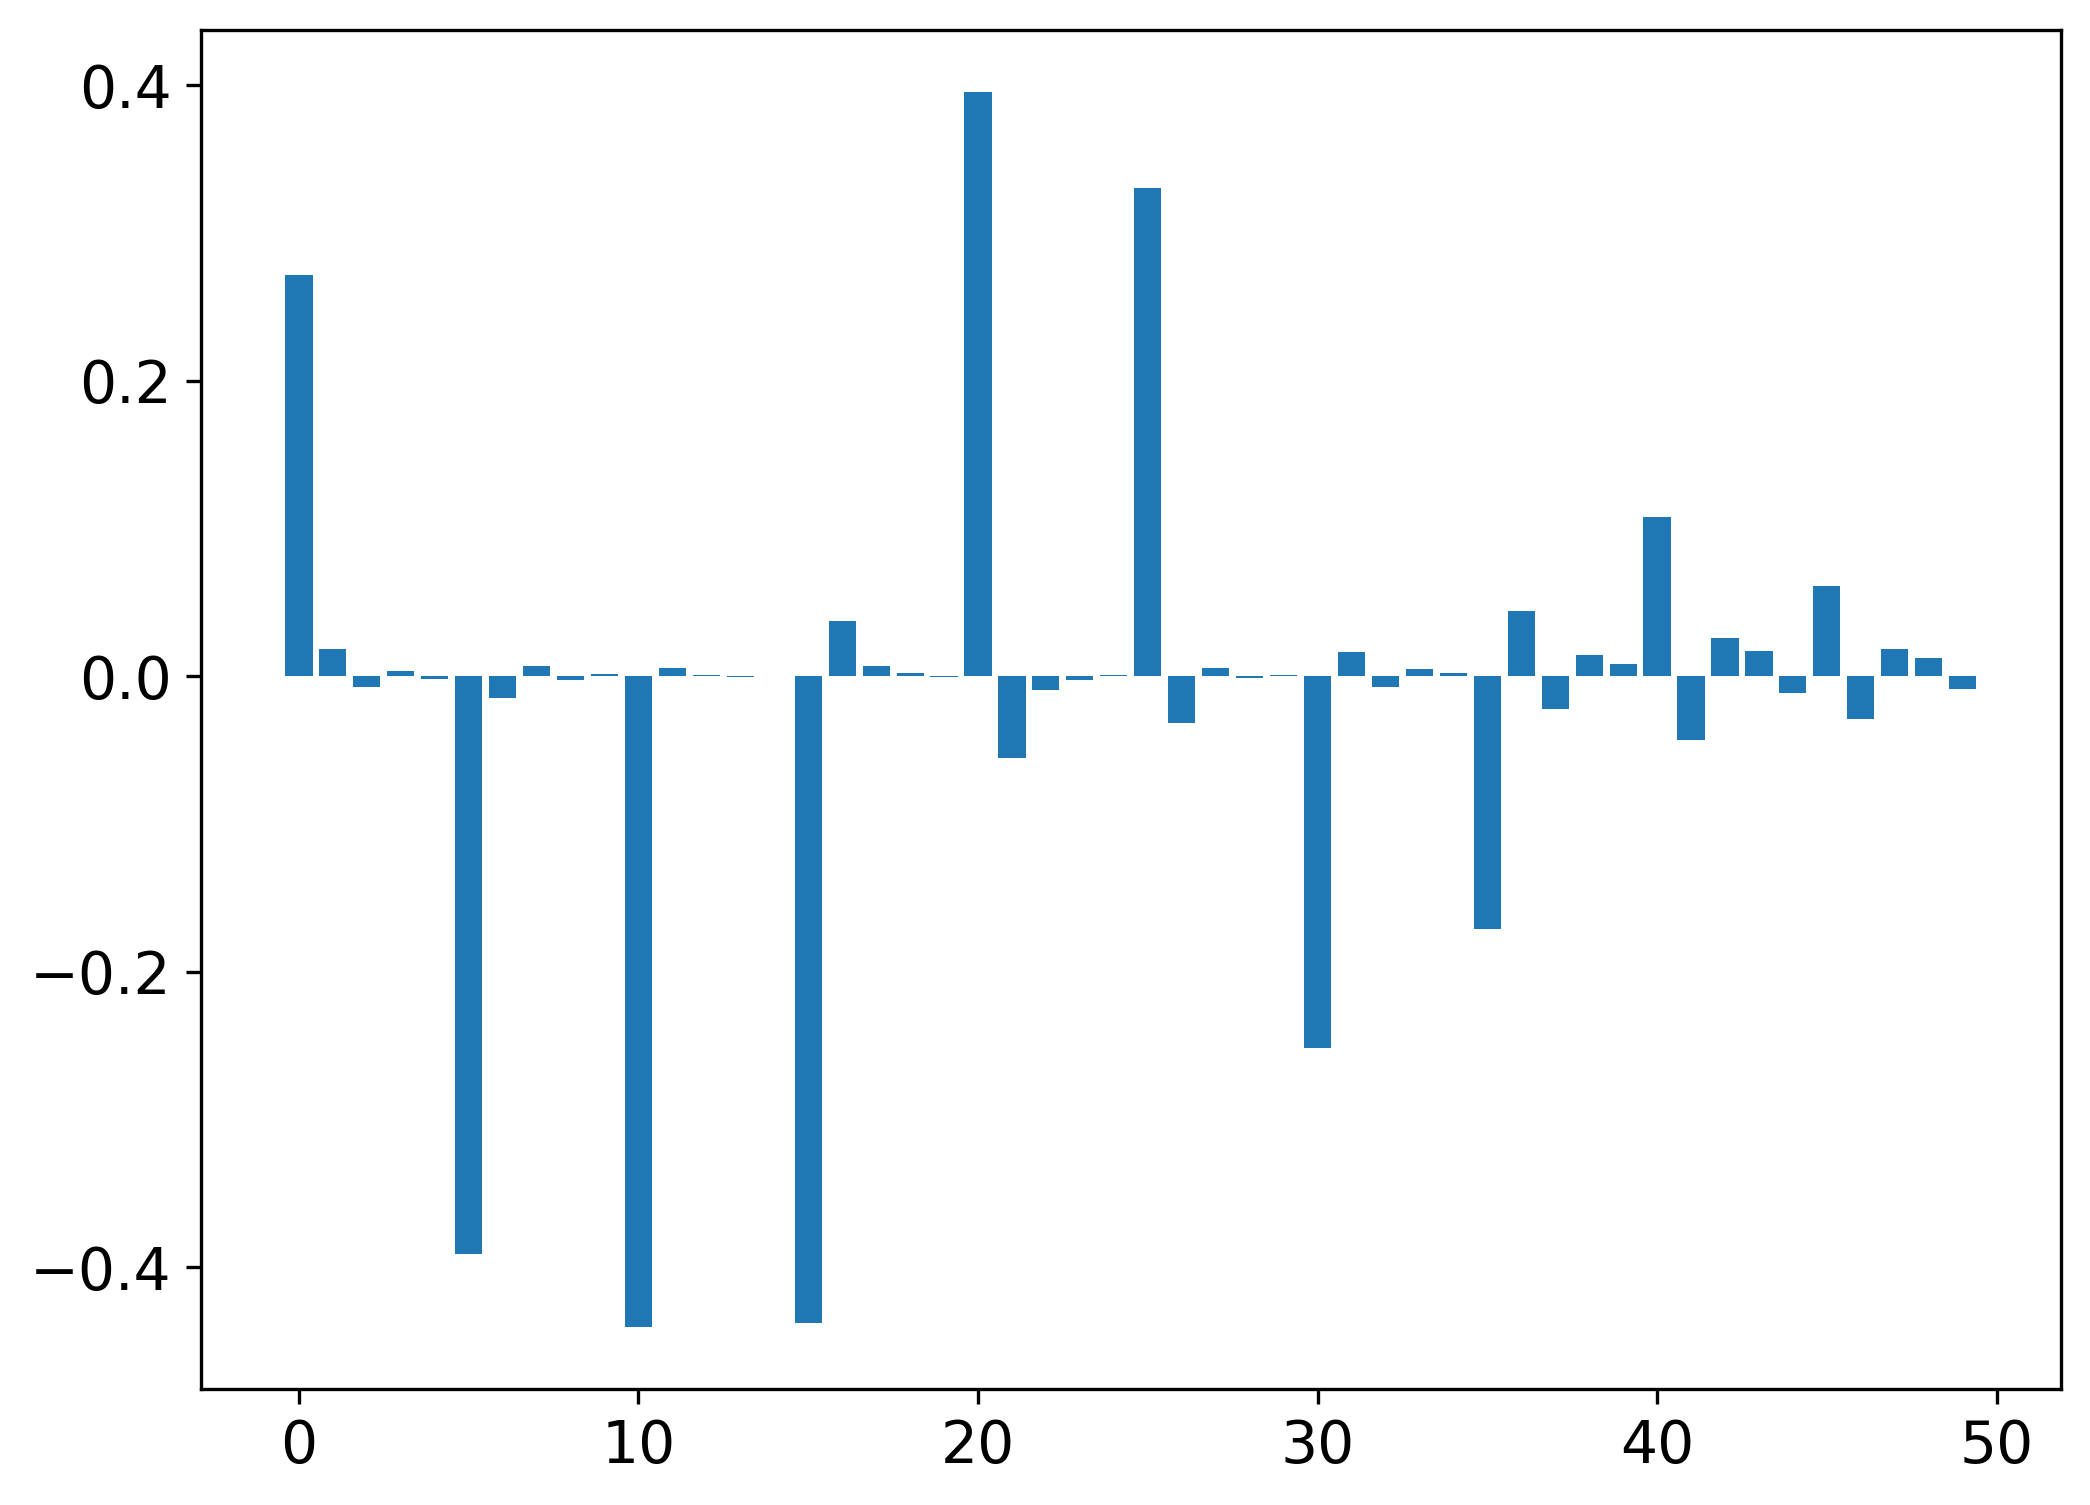

In [53]:
# eigvals, eigvecs = np.linalg.eigh(h_dvr)
# print(eigvals[0], eigvecs.T[0])
plt.bar(range(eigvecs5.shape[1]), eigvecs5.T[0])

In [54]:
eigvecs5.shape

(50, 50)

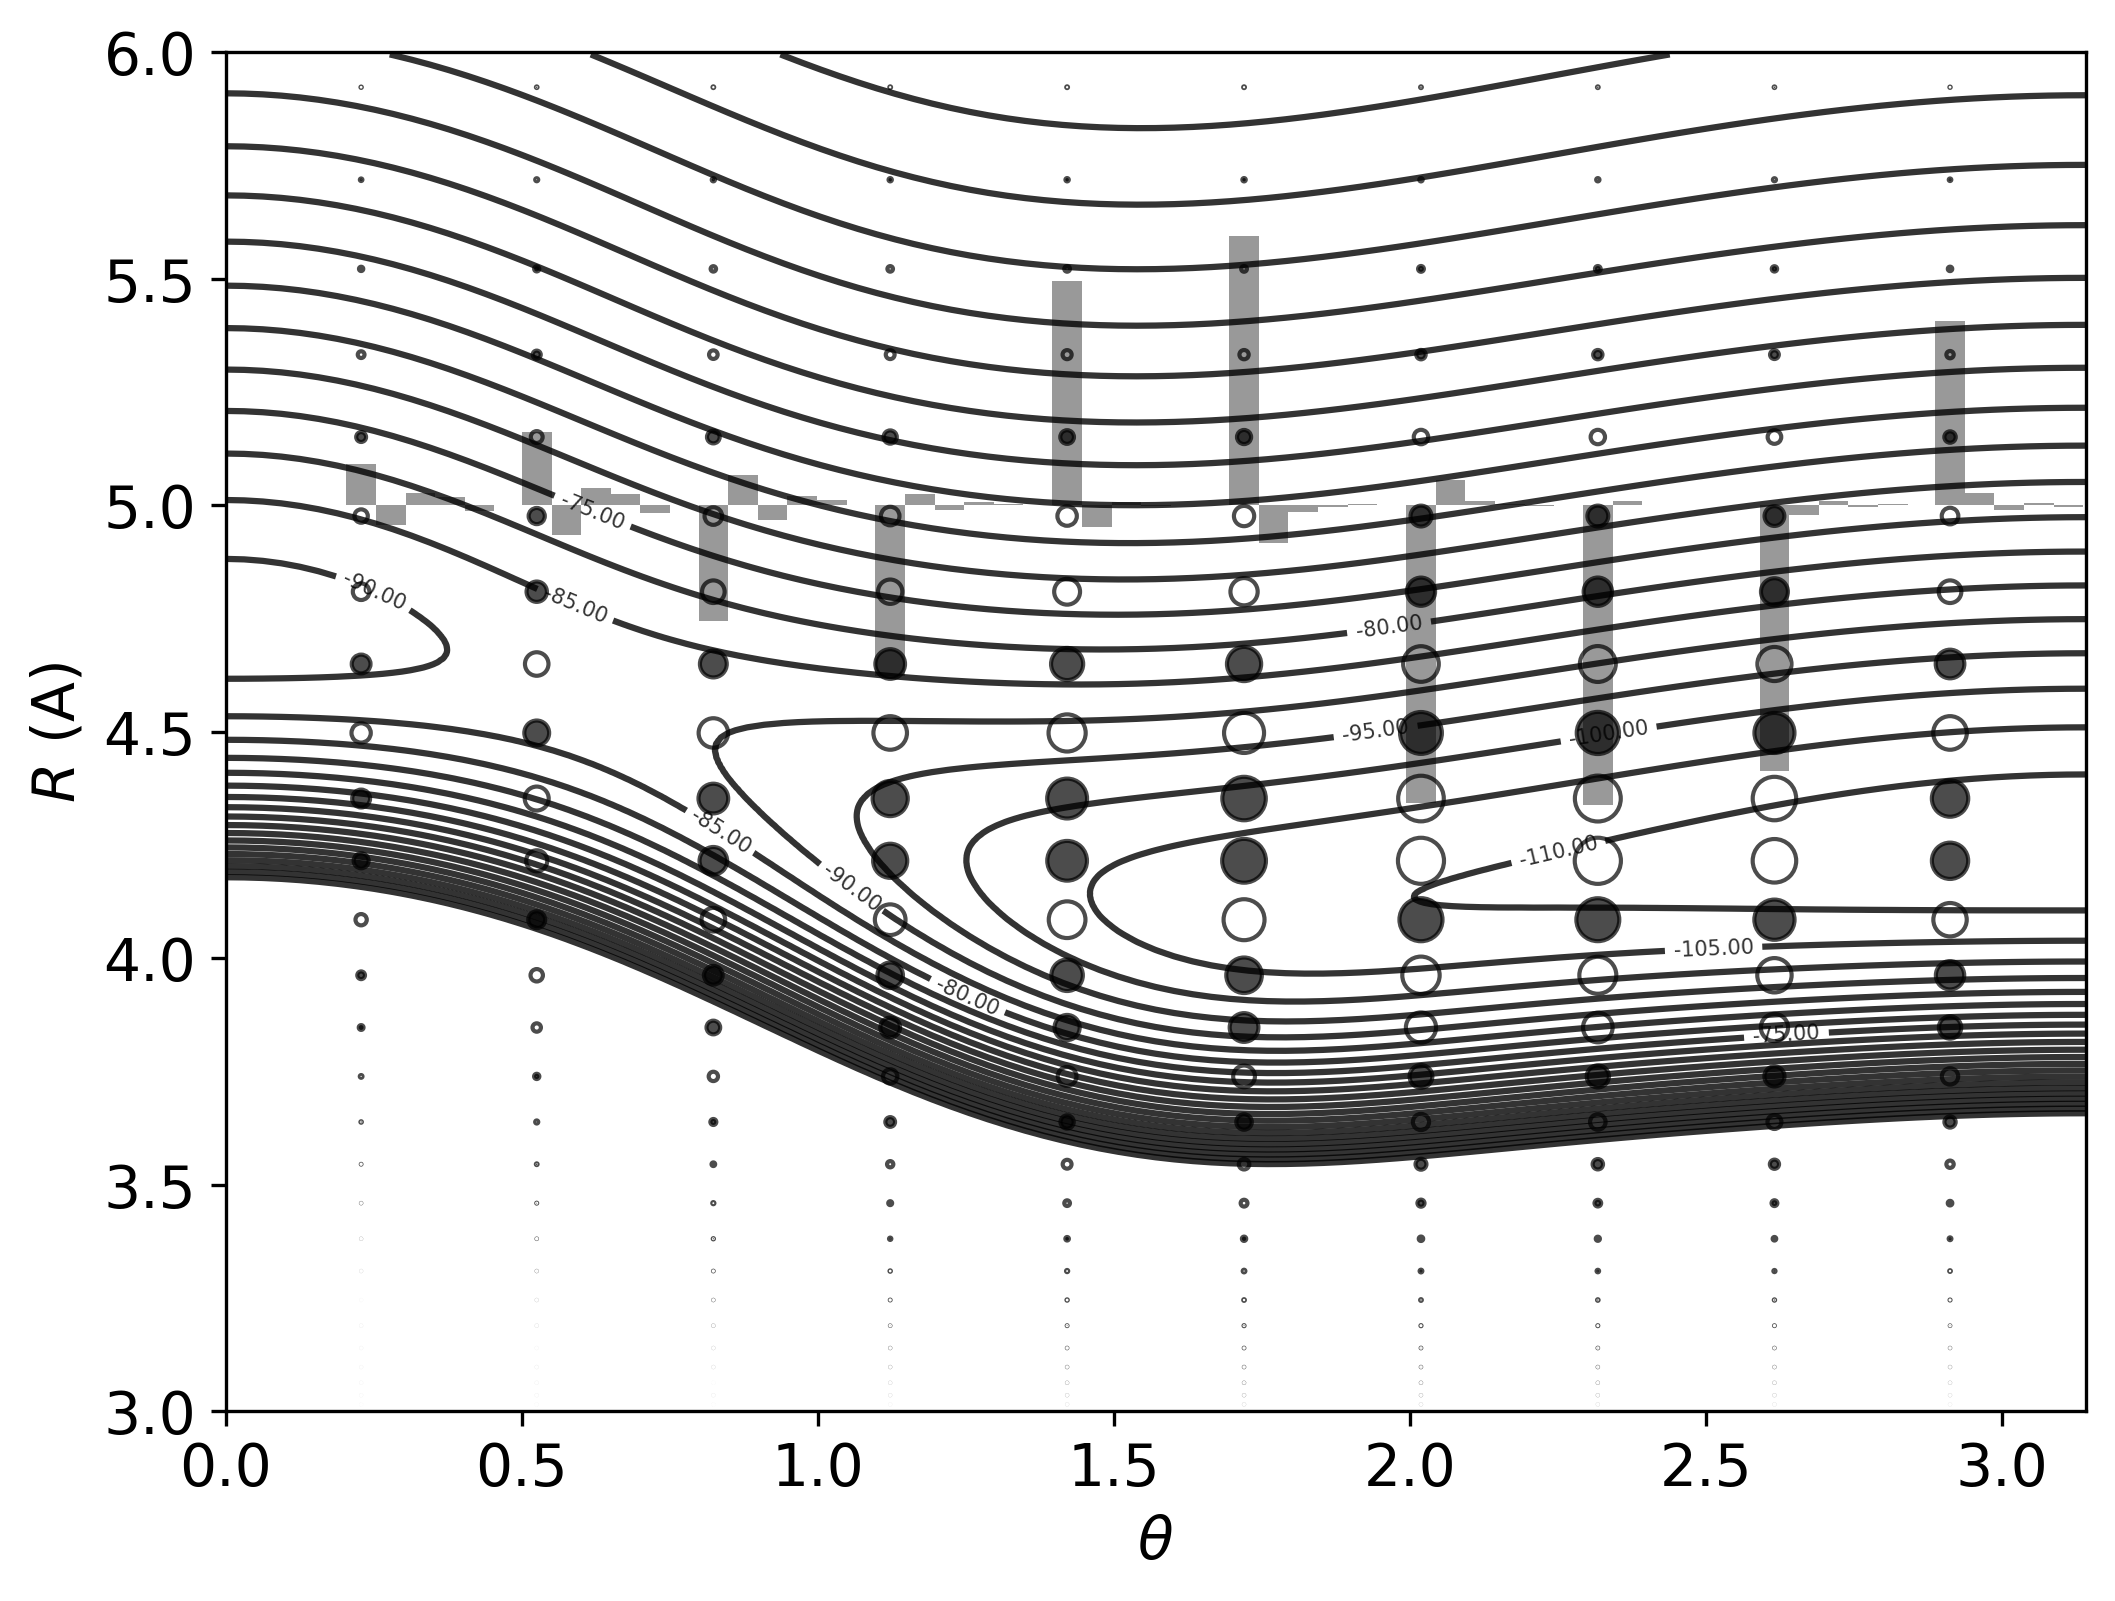

In [60]:
cmap = plt.get_cmap('tab10')

p = plt.tricontour(theta_p[r_p < 6], r_p[r_p < 6], v_p[r_p < 6], levels=np.linspace(-110, 0, 23), colors='black', linestyles='solid', alpha=0.8)
# plt.plot(theta[ind_min1], r[ind_min1], 'x', c='black')
# plt.plot(theta[ind_min2], r[ind_min2], 'x', c='black')
# plt.plot(1.8754889808102941, 3.897, 'o', c='black')
Rs_grid, Xs_grid = np.meshgrid(Rs_DVR * mgnh_params['S'] * au_to_angs, np.arccos(Xs_K[0]))
Rs_grid, Xs_grid = Rs_grid.flatten(), Xs_grid.flatten()

labels = p.levels[:-15:]
plt.clabel(p, inline=1, fontsize=5, levels=labels, fmt='%.2f', use_clabeltext=True)
plt.ylim()
plt.xlabel('$\\theta$')
plt.ylabel('$R$ (A)')
plt.ylim((3, 6))
plt.xlim((0, np.pi))

offset = 0.05
plt.bar(np.arccos(Xs_K[0]), eigvecs5.T[0][::5] * 1.5, bottom=5, width=0.05, color='black', alpha=0.4)
plt.bar(np.arccos(Xs_K[0]) + 1 * offset, eigvecs5.T[0][1::5] * 1.5, bottom=5, width=0.05, color='black', alpha=0.4)
plt.bar(np.arccos(Xs_K[0]) + 2 * offset, eigvecs5.T[0][2::5] * 1.5, bottom=5, width=0.05, color='black', alpha=0.4)
plt.bar(np.arccos(Xs_K[0]) + 3 * offset, eigvecs5.T[0][3::5] * 1.5, bottom=5, width=0.05, color='black', alpha=0.4)
plt.bar(np.arccos(Xs_K[0]) + 4 * offset, eigvecs5.T[0][4::5] * 1.5, bottom=5, width=0.05, color='black', alpha=0.4)
# plt.axhline(4.0, linestyle='dashed', c='black', linewidth=0.2)

for i in range(N_theta):
    evec = eigvecs.T[0][i * N_R_lim:(i+1) * N_R_lim]
    epos = np.where(evec >=0, evec, 0)
    eneg = np.where(evec <0, -evec, 0)
    plt.scatter(np.repeat(np.arccos(Xs_K[0][i]), N_R_lim), Rs_DVR * mgnh_params['S'] * au_to_angs, marker='o', facecolors='black', edgecolors='black', s=epos * 600, zorder=20, alpha=0.7)
    plt.scatter(np.repeat(np.arccos(Xs_K[0][i]), N_R_lim), Rs_DVR * mgnh_params['S'] * au_to_angs, facecolors='none', edgecolors='black', s=eneg * 600, alpha=0.7, zorder=20)

In [189]:
from scipy.optimize import minimize

x = 0
f = lambda r: pot2d([r], [x]) * hartree
minimize(f, 3.5)

/Users/user/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


KeyboardInterrupt: 